# go

In [ ]:
-- done --
~화
노출시간  : 알고리즘 수정
공휴일 : column 생성
---------
~수
상품명에서 대,중,소분류 
---------
~목
크롤링 ??
---------
~금
# 데이터 관련

2 ) 크롤링 ????? 세트
5 ) feature
    
# 상품명 분석
wordvector_ 유사한 문장 찾아내는 방법
슬랙참고

# 상품코드가 최신이 아닌지 볼 수 있을까 ?


# 모델링 관련
1 ) RandomsearchCV 찾아보기
2 ) ?

+ NS 도메인 활용

월, 주, 일별 특가 , 마트 특가, 신규 오픈 : 편성되는시간, 제품, 카테고리 
-- 
과거 데이터가 없음

쇼핑몰내 '상품명' 검색 후, 평점 feature 생성
--
단일 제품(인터넷)을 묶어서 판매함(홈쇼핑)
=> 색상, 니트의 종류 등등이 고려가 안된 것
=> 없는것도 많음


네이버에 '상품명' 검색 후, 평점 feature 생성
--
제품명이 확실하게 나오지 않고, 동일하게 판매하는 곳이 많다 ( 지마켓 등등 )
a. 다른 쇼핑몰의 상품가격과 관계가 있을까 ?


베스트 가중치 주는 column ( 홈페이지에 각 카테고리별 베스트가 있음 )
--
화면이 안보임

시즌별로 베스트가 변경되는 점을 고려하면 좋겠다 : 계절적인 것 반영할 수 있어서 더 좋을 것 같음


고정 채널 편성표
--
=> 작년 편성표 확인 필요 ( 최유라의 ~~~ ) 


쇼호스트가 중요한데 !
--
A. 쇼호스트가 누구였는지 찾을 수 없음
B. 제품마다 강조하는 부분이 있을까 ? 
C. 우회해서 쇼호스트가 강조할 것을 예상할 수 있는건 어떤게 있지 ? 
   
    a.날씨 _ 준영님 기온데이터 + 재호님 그래프 같이보자
    
       가. 봄
            ㄱ. 외출 증가 : food 감소
            ㄴ. 황사 : 마스크 => 생활용품 증가 ( 겨울도 확인 필요 )
            ㄷ. 옷정리 : 옷걸이, 행거 => 생활용품 증가
            ㄹ. 이사철 : 가전제품 증가
            
       나. 여름
           ㄱ. 침구 변경 : 침구 증가 ( 비교해볼 것 : 겨울은 왜 소폭일까 ? )
           ㄴ. 다이어트 : 건강식품 증가
           ㄷ. 땀 + 장마 : 속옷증가
           
       다. 가을
           ㄱ. 추석 선물 상품 : food 증가 ( 이부분은 꼭 고려해주어야함 ) 
           ㄴ. 추석 관련 상품 : 생활용품 증가 ( 예초기, 교자상 ㅋㅋㅋ )
           ㄷ. 산행 증가 : 잡화 증가 ( 등산화 ), 생활용품 증가 ( 등산용품 )
           ㄹ. 추워짐 : 생활용품 증가 ( 온열매트, 단열벽지 )
          
       라. 겨울
           ㄱ. 전기장판
           ㄴ. 선물 ? 
           ㄷ. 김장
       
    b. 시청률 - 은정님이 분석중
    
        가. 고정 프로그램_쇼호스트 
        나. 주기성
    

In [74]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime
import time

# 행 많이보기
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 한글 폰트 설정

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('font', size=12)
plt.figure(figsize=(20,10))

# 지수 표현 안보기


# 데이터 로드
df = pd.read_csv('./data/train_ongoing.csv', encoding='cp949')
#df = pd.read_csv('./data/train_raw.csv', encoding='cp949')
# df, data, new_data

 
# df.loc[df['취급액']==1]['취급액'] = 50000
df

,month,day,요일,hour,minute,노출(분),repeat,상품군,마더코드,상품코드,items,상품명,판매단가,취급액/total,취급액,holiday
0,1,1,1,6,0,20,3,의류,100346,201072,2,테이트 남성 셀린니트3종,39900,0.174437,2099000,0
1,1,1,1,6,0,20,3,의류,100346,201079,2,테이트 여성 셀린니트3종,39900,0.211538,4371000,0
2,1,1,1,6,20,20,3,의류,100346,201072,2,테이트 남성 셀린니트3종,39900,0.271088,3262000,0
3,1,1,1,6,20,20,3,의류,100346,201079,2,테이트 여성 셀린니트3종,39900,0.336592,6955000,0
4,1,1,1,6,40,20,3,의류,100346,201072,2,테이트 남성 셀린니트3종,39900,0.554475,6672000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,12,31,1,23,40,20,4,주방,100448,201391,3,일시불쿠첸압력밥솥 6인용,148000,0.240687,10157000,0
37368,12,31,1,24,0,20,4,주방,100448,201383,3,무이자쿠첸압력밥솥 10인용,178000,0.448955,50929000,0
37369,12,31,1,24,0,20,4,주방,100448,201390,3,일시불쿠첸압력밥솥 10인용,168000,0.924175,104392000,0
37370,12,31,1,24,0,20,4,주방,100448,201384,3,무이자쿠첸압력밥솥 6인용,158000,0.326185,13765000,0


<Figure size 1440x720 with 0 Axes>

# 데이터 정제

In [66]:
# 데이터 로드
data = pd.read_csv('data/train_raw.csv', encoding='cp949', header=0, parse_dates=["방송일시"])

# 상품군 = 무형 제거 

data.drop(data[data['상품군']=='무형'].index, inplace=True)
data.reset_index(inplace=True)


# 판매단가, 취급액 쉼표 제거 , int 변환

data['판매단가'] = data['판매단가'].str.replace(',','').astype(int)
data[' 취급액 '] = data[' 취급액 '].str.replace(',','').astype(int)
data['노출(분)'] = data['노출(분)'].astype(int)


# 방송일시 column 분리 ( , 일, 시, 분, 요일 )

data['방송일시'] = pd.to_datetime(data['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

data['month'] = data['방송일시'].dt.month
data['day'] = data['방송일시'].dt.day
data['hour'] = data['방송일시'].dt.hour
data['minute'] = data['방송일시'].dt.minute
data['요일'] = data['방송일시'].dt.weekday

# 06 ~ 익일 02 가 한 cycle임을 고려하여 0, 1, 2 에 +24를 해주자

# def plus_24(x) :
#     if x in [0, 1, 2] :
#         return x + 24
#     else :
#         return x
    
# data['hour'] = list(map(plus_24, data['hour']))
overnight_index_list = data.loc[(data["hour"] >=0) & (data["hour"] < 3)].index

overnight_index_list
data.loc[overnight_index_list, "hour"] += 24
data.loc[overnight_index_list, "day"] -= 1
data.loc[overnight_index_list, "요일"] -= 1
data.loc[data["요일"] == -1, "요일"] = 6

### 엑셀에서 수정필요
# day = 0 인 곳, 그 전달의 마지막 날짜로 변경해주기
# month, day 변경 필요
# 2월은 28일까지
# 연말 12 / 31
# 다음달로 넘어가거나 다음연도로 넘어간 항목은 월,일 재조정
data.loc[(data["month"] == 2) & (data["day"] == 0), ["month", "day"]] = 1, 31
data.loc[(data["month"] == 3) & (data["day"] == 0), ["month", "day"]] = 2, 28
data.loc[(data["month"] == 4) & (data["day"] == 0), ["month", "day"]] = 3, 31
data.loc[(data["month"] == 5) & (data["day"] == 0), ["month", "day"]] = 4, 30
data.loc[(data["month"] == 6) & (data["day"] == 0), ["month", "day"]] = 5, 31
data.loc[(data["month"] == 7) & (data["day"] == 0), ["month", "day"]] = 6, 30
data.loc[(data["month"] == 8) & (data["day"] == 0), ["month", "day"]] = 7, 31
data.loc[(data["month"] == 9) & (data["day"] == 0), ["month", "day"]] = 8, 31
data.loc[(data["month"] == 10) & (data["day"] == 0), ["month", "day"]] = 9, 30
data.loc[(data["month"] == 11) & (data["day"] == 0), ["month", "day"]] = 10, 31
data.loc[(data["month"] == 12) & (data["day"] == 0), ["month", "day"]] = 11, 30
data.loc[(data["month"] == 1) & (data["day"] == 0), ["month", "day"]] = 12, 31


# use data
df = data.loc[:,['month','day','hour','minute','요일','상품군','마더코드','상품코드','상품명','노출(분)','판매단가',' 취급액 ']]

In [48]:
# use data
df = data.loc[:,['month','day','hour','minute','요일','상품군','마더코드','상품코드','상품명','노출(분)','판매단가',' 취급액 ']]


# 무이자, 일시불을 나타내는 단어 통일
def replace_word(x) :
    if '무)'in x :
        return x.replace('무)', '무이자')
    elif '일)' in x :
        return x.replace('일)', '일시불')
    else :
        return x
    
df['상품명'] = list(map(replace_word, df['상품명'])) 

# 일시불 = 1, 무이자 = 2 로 하는 column 생성
new = []
for i in range(len(df['상품명'])) :
    if '일시불' in df['상품명'][i] :
        df['상품명'][i] = df['상품명'][i].replace('일시불','')
        new.append(1)
    elif '무이자' in df['상품명'][i] :
        df['상품명'][i] = df['상품명'][i].replace('무이자','')
        new.append(2)
    else :
        new.append(0)

df['pay_type'] = pd.DataFrame(new)


# 엑셀로 저장, 월일 변경하는거 잊지말기 !!!
# df.to_csv('./analysis/tmp.csv', index=False, encoding='cp949')



C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
#df.to_csv('./data/train2.csv', encoding='cp949')
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

# 상품명_키워드



## 시도하는중 !!! 정리중

시도 : '햇', '초특가', '국내산', '무료', '파격가', '100%', '자연산', '손질', '여성', '남성', '일시불','무이자'

notyet : 
* 상품명에 사람이름이 있으면 ? ( 이봉원, 팽현숙, 김정배 등등 )  
* 지역명이 있으면 ? ( 완도, 흥양, 제주 등등 / 주의 : 대구가 있는데 생선 대구 있음 )

=> 생각보다 많이 없음, 찾기 어려움, ?!?!

* 1 + 1, 세트, 단하루, 역시즌 
* TV 크기 / 밥솥 몇인용 / 가스레인지 몇구 / 몇종세트 / 음식몇팩 / 온열매트더블싱글 /
* 

[ 생각해보기 ]

* 상품명 : 일시불, 무이자로 나누기, 무), (무), (일) 


=> 일시불, 무이자의 전체 합, 평균은 편성 횟수 및 시기가 비슷하고, 제품의 가격 또한 같다

=> 제품을 사야겠다고 생각한 뒤 가장 최종적으로 결정하는 요소임

=> 무이자라고, 일시불이라고 제품을 사는게 아니다 !!!!!

=> 같은 상품에 대해 일시불, 무이자가 영향을 미치는지는 모델링을 해봐야 알 것 같다


* 브랜드(마더코드) 활용 


=> 브랜드 파워를 고려해줄 수 있을까 ? 

=> 마더코드별 취급액 확인 후, 취급액의 범위에 따라 / 판매단가 범위에 따라 범주화해보자  



* 초특가(328), 파격가(99), 100%(59) 등등


=> 같은 상품인데 상품명에 '단어'가 붙음에 따라 취급액에 변화가 있는지 확인 필요

=> 판매 단가의 변동이 있을 수도 있기 때문에 이것도 같이 확인해주자 


* 국내산(861) // 햇(185) // 손질(979) // 자연산(135)


=> 좋은거 먹자!는 마음! 

=> 같은 상품코드에 대해 국내산 / 아닌 것 의 비교

비교하고자 하는 게 같은 품목에 대한 국내산 or not 인지, 같은 제품에 대해 상품명 국내산 표기 or not인지 명확히 하기( 확인해야함 )


* 여행, 투어(무형이라서 상관 ㄴ, 여행가방은 관계 있을 듯 )


=> 작년은 많았을텐데 올해는 없을 것으로 예상...............

=> 데이터를 아예 빼는게 좋지 않을까?????? 라는 생각이 든다아

=> 상품명에 회사 + 제품이 있는데 회사(참좋은여행)에서 호텔 을 판매할 수도 있지 않나????( 확인해야함 )


* 무료(227) / 체험(42)


=> 이런 키워드가 어떤 영향이 있을지???????????




* 1+1 , 세트 / 6인용, 10인용


=> 해보고 싶은데 종류가 너무 많아............. 제일 마지막에 해보장

In [2]:
# 이외에 '특정단어'를 포함한 상품명에 대해 분석하고 싶은 경우
def make_new_col(word) :
    new = []
    for i in range(len(df['상품명'])) :
        if word in df['상품명'][i] :
            df['상품명'][i] = df['상품명'][i].replace(word,'')
            new.append(1)
        else :
            df['상품명'][i] = df['상품명'][i].replace(word,'')
            new.append(0)
    df[word] = pd.DataFrame(new)
    return df

df = make_new_col('햇')
df = make_new_col('초특가')
df = make_new_col('국내산')
df = make_new_col('무료')
df = make_new_col('파격가')
df = make_new_col('100%')
df = make_new_col('자연산')
df = make_new_col('손질')
df = make_new_col('무료')
df = make_new_col('여성')
df = make_new_col('남성')

C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
# df.to_csv('./analysis/tmp.csv', encoding='cp949')

## 햇


* 특정 키워드를 추출해서 어떤걸 확인해보지 ???

- 노출시간에 따라 취급액을 확인했더니 11분일 때 취급액이 매우크다.

-> 확인 결과 '햇' 단어 확인
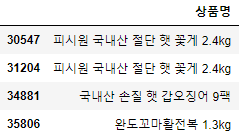

->  '햇' 단어가 든 상품 / 아닌 것 비교해보자

---
---
---
---
---
노출시간을 먼저 합해줘야하나 ????? pending !!!!!!!!

In [10]:
idx = []
for i in range(len(df['상품명'])) : 
    if '햇' in df['상품명'][i] :
        idx.append(i)

# '햇'글자 포함(185row)
print(df.iloc[idx].mean())
# '햇'글자 제외
print(df.drop(idx).mean())


## 주의 : '햇' 단어에 햇반?과 같은 단어 있는지 확인 (test set)
## 결과 : 판매단가가 비슷, 노출시간은 '햇' 단어 제외가 더 많음, 취급액은 '햇'포함이 훨씬 높음
## + ) 당연한 것 같기도하고 ???????????????????
## 아닌가????????????

month       1.044324e+01
day         1.736216e+01
hour        1.690811e+01
minute      1.967568e+01
요일          3.383784e+00
마더코드        1.003487e+05
상품코드        2.013257e+05
노출(분)       1.962162e+01
판매단가        4.990000e+04
 취급액        6.551279e+07
pay_type    0.000000e+00
dtype: float64
month       6.443461e+00
day         1.527676e+01
hour        1.630594e+01
minute      2.007287e+01
요일          3.015973e+00
마더코드        1.003897e+05
상품코드        2.012113e+05
노출(분)       2.038546e+01
판매단가        4.700806e+05
 취급액        2.165595e+07
pay_type    5.793422e-01
dtype: float64


## 국내

In [157]:
idx = []
for i in range(len(df['상품명'])) : 
    if '국내' in df['상품명'][i] :
        idx.append(i)

# '국내'글자 포함(861row)
print(df.iloc[idx].mean())
# '국내'글자 제외
print(df.drop(idx).mean())


month       7.663182e+00
day         1.612311e+01
hour        1.658653e+01
minute      1.995354e+01
노출(분)       1.980720e+01
상품코드        2.014426e+05
판매단가        1.114094e+05
 취급액        4.186980e+07
요일          3.011614e+00
마더코드        1.004164e+05
pay_type    2.229965e-01
new_idx              inf
dtype: float64
month       6.434198e+00
day         1.533031e+01
hour        1.630237e+01
minute      2.007368e+01
노출(분)       2.039522e+01
상품코드        2.012064e+05
판매단가        4.764097e+05
 취급액        2.140149e+07
요일          3.017940e+00
마더코드        1.003889e+05
pay_type    5.848101e-01
new_idx              inf
dtype: float64


## 손질

In [160]:
idx = []
for i in range(len(df['상품명'])) : 
    if '손질' in df['상품명'][i] :
        idx.append(i)

# '손질'글자 포함(861row)
print(df.iloc[idx].mean())
# '손질'글자 제외
print(df.drop(idx).mean())

month       6.236977e+00
day         1.565679e+01
hour        1.654545e+01
minute      2.006129e+01
노출(분)       1.983555e+01
상품코드        2.014663e+05
판매단가        4.786834e+04
 취급액        4.990134e+07
요일          3.006129e+00
마더코드        1.004332e+05
pay_type    0.000000e+00
new_idx              inf
dtype: float64
month       6.468579e+00
day         1.534029e+01
hour        1.630256e+01
minute      2.007117e+01
노출(분)       2.039637e+01
상품코드        2.012050e+05
판매단가        4.793025e+05
 취급액        2.111907e+07
요일          3.018108e+00
마더코드        1.003883e+05
pay_type    5.919820e-01
new_idx              inf
dtype: float64


## 여성 남성

### 이렇게 보면 안된다

In [115]:
df.groupby(['요일','여성', '남성']).count()['취급액'] # .to_csv('./analysis/ttt.csv',encoding='cp949')#.plot()

요일  여성  남성
0   0   0     4652
        1      331
    1   0      225
1   0   0     4937
        1      343
    1   0      232
2   0   0     4820
        1      306
    1   0      221
3   0   0     4813
        1      273
    1   0      189
4   0   0     4605
        1      307
    1   0      199
5   0   0     4391
        1      498
    1   0      319
6   0   0     4883
        1      525
    1   0      303
Name: 취급액, dtype: int64

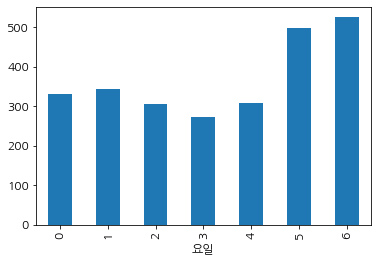

In [3]:
df[df['남성']==1].groupby('요일').count()['취급액'].plot(kind='bar')

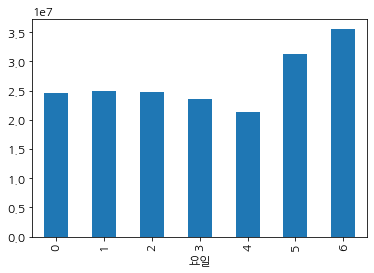

In [4]:
df[df['남성']==1].groupby('요일').mean()['취급액'].plot(kind='bar')

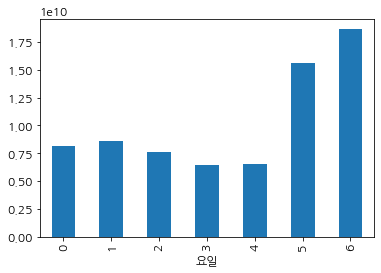

In [5]:
df[df['남성']==1].groupby('요일').sum()['취급액'].plot(kind='bar')

### 남성, 여성 키워드를 제외하고 상품명이 같을 때를 비교하자

In [131]:
# 남성, 여성 column 둘 중 하나가 1이면 index 가져오기
# 남성, 여성 따로 저장해주자

# index 핑퐁하면서 연속되는거만 가져와.................................아니................잠ㄱ깐.
# 남성남성남성 방지 
# 남성여성 ok
# 만약에 남성남성여성여성 있으면 어떡하자..?/?

####???????????????

,month,day,요일,hour,minute,노출(분),repeat,상품군,마더코드,상품코드,...,햇,초특가,국내산,무료,파격가,100%,자연산,손질,여성,남성
0,1,1,1,6,0,20,3,의류,100346,201072,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,6,0,20,3,의류,100346,201079,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,6,20,20,3,의류,100346,201072,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,6,20,20,3,의류,100346,201079,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,6,40,20,3,의류,100346,201072,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,12,31,1,23,40,20,4,주방,100448,201391,...,0,0,0,0,0,0,0,0,0,0
37368,12,31,1,24,0,20,4,주방,100448,201383,...,0,0,0,0,0,0,0,0,0,0
37369,12,31,1,24,0,20,4,주방,100448,201390,...,0,0,0,0,0,0,0,0,0,0
37370,12,31,1,24,0,20,4,주방,100448,201384,...,0,0,0,0,0,0,0,0,0,0


# 노출 시간

같은 제품을 연속적으로 방송해서 편성표에 3번 * 2번 배치된 것도 있고 : 3 / 22 . 200889 ( 20분씩 편성됨 )

같은 제품인데 시간을 다르게 해서 편성표에 6번 로 배치된 것도 있다 : 12 / 22 , 200153 ( 10분씩 편성됨 )

month, day가 같은데 상품코드가 같다면 ? ( 여기에 일시불 , 무이자 / 몇인용 그런거 다 포함 된거임 )

=> 이걸로 하면 안됨 => 하루에 상품을 여러 시간대에 배치하는 경우가 있음

## 노출(분) 데이터 뜯어보자

In [5]:
## 단순 편성 개수 ( 연달아 있는거 있음 주의 )
df['노출(분)'].value_counts()

20    33057
30     2625
10      813
15      453
17      161
16      117
13       67
26       12
25       11
23        9
18        6
7         6
3         6
12        5
5         5
22        4
11        4
19        3
27        2
14        2
40        2
9         1
2         1
Name: 노출(분), dtype: int64

In [8]:
# 편성 개수 대비 취급액 평균이 높은 것
df[' 취급액 '].groupby(df['노출(분)']).mean().sort_values(ascending=False)

노출(분)
11    5.644025e+07
18    2.792483e+07
27    2.589550e+07
20    2.228159e+07
30    2.144906e+07
19    2.139367e+07
7     1.809683e+07
10    1.699862e+07
14    1.680200e+07
22    1.668525e+07
17    1.485490e+07
13    1.269301e+07
26    1.165175e+07
15    1.132159e+07
23    1.107933e+07
2     1.073100e+07
12    1.070180e+07
40    1.014050e+07
3     1.013067e+07
25    9.765273e+06
16    9.693538e+06
5     7.447000e+06
9     9.710000e+05
Name:  취급액 , dtype: float64

In [13]:
df.loc[df['노출(분)']==11]

,month,day,hour,minute,노출(분),상품코드,상품명,판매단가,취급액,요일,상품군,마더코드,pay_type
30547,10,20,16,40,11,201486,피시원 국내산 절단 햇 꽃게 2.4kg,49900,53796000,6,농수축,100492,0
31204,10,27,16,40,11,201486,피시원 국내산 절단 햇 꽃게 2.4kg,49900,82924000,6,농수축,100492,0
34881,12,5,21,0,11,201004,국내산 손질 햇 갑오징어 9팩,49900,47069000,3,농수축,100317,0
35806,12,14,17,20,11,201634,완도꼬마활전복 1.3kg,29900,41972000,5,농수축,100548,0


In [14]:
# 취급액 최대값인 노출시간
df[' 취급액 '].groupby(df['노출(분)']).max().sort_values(ascending=False)

노출(분)
17    322009000
20    270284000
30    153959000
13    108590000
10     84950000
11     82924000
18     76905000
7      63269000
15     55655000
16     41859000
25     33264000
3      30798000
27     29034000
26     26273000
19     24885000
22     24475000
23     22171000
12     20502000
14     17818000
40     16770000
5      16426000
2      10731000
9        971000
Name:  취급액 , dtype: int64

In [12]:
df.loc[df['노출(분)']==17]

,month,day,hour,minute,노출(분),상품코드,상품명,판매단가,취급액,요일,상품군,마더코드,pay_type
66,1,1,25,40,17,200652,레이프릴 무빙 맥시풀커버 브라팬티,69900,18695000,1,속옷,100193,0
170,1,2,25,40,17,201894,푸마 웜셀 기모 치마레깅스 3종,59000,24910000,2,속옷,100613,0
265,1,3,25,40,17,200800,벨라홈 논슬립 옷걸이 세트,29800,20974000,3,생활용품,100229,0
349,1,4,25,40,17,200952,[가이거] 제니스시계 주얼리세트,129000,20633000,4,잡화,100293,1
350,1,4,25,40,17,200949,[가이거] 제니스시계 주얼리세트,139000,8495000,4,잡화,100293,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36965,12,26,25,40,17,201006,블랙모어스 알티지 오메가3 3병 (53주분),95200,9804000,3,건강기능,100312,0
37040,12,27,25,40,17,202484,옛날 그 쥐포 110장 (11팩),32900,29330000,4,농수축,100841,0
37131,12,28,25,40,17,202114,아이앤아이 퀵래쉬 속눈썹세트,59000,20588000,5,이미용,100723,0
37209,12,29,25,40,17,201021,코이모 리빙박스 8종,50800,18854000,6,생활용품,100226,0


In [19]:
df.loc[df['노출(분)']==17].sort_values(by=' 취급액 ', ascending=False)
## 이상치로 봐야할까 ? 34988(max), 32564(min)

,month,day,hour,minute,노출(분),상품코드,상품명,판매단가,취급액,요일,상품군,마더코드,pay_type
34988,12,6,25,40,17,201322,코몽트 덤블 플리스 자켓 2종,39900,322009000,4,의류,100418,0
28746,10,2,25,40,17,201367,쿠미투니카 롱 하이웨스트 팬티세트,59900,38910000,2,속옷,100444,0
36061,12,16,25,40,17,200897,헤스티지 엘레나 라쿤양가죽 콤비 롱코트,299000,32763000,0,의류,100271,0
33132,11,16,25,40,17,202484,옛날 그 쥐포 110장 (11팩),32900,30877000,5,농수축,100841,0
35094,12,7,25,40,17,200666,오델로 여성 겨울모자 3종,29800,30464000,5,잡화,100197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33831,11,24,25,40,17,201326,킹스스파 편백 반신욕기,569000,1869000,6,생활용품,100421,0
35239,12,8,25,40,17,202081,아미니 비노테라 오일 워시(구성2),59900,944000,6,이미용,100711,0
36438,12,20,25,40,17,201874,푸마 드라이셀 쉐이핑 레깅스 3종,59000,607000,4,속옷,100613,0
35095,12,7,25,40,17,200665,오델로 남성 겨울모자 3종,29800,426000,5,잡화,100197,0


## 노출(분)과 편성 개수 관계 

In [4]:
tmp = df.groupby(['month','day','상품코드']).sum()[' 취급액 ']
tmp2 = df.groupby(['month','day','상품코드']).count()[' 취급액 ']

In [76]:
x = []
for i in tmp.index :
    print('취급액 : ', tmp[i], '개수 : ', tmp2[i])
    if tmp2[i] in [4,5,6,8,9,10,12] : 
        x.append(i)
        if tmp2[i] == 6:
            print('------------------------------------------------',i)

# tmp[x].to_excel('./analysis/하루안에상품여러번판매.xlsx', encoding='cp949')

취급액 :  222836000 개수 :  3
취급액 :  192141000 개수 :  3
취급액 :  123876000 개수 :  3
취급액 :  160698000 개수 :  3
취급액 :  43858000 개수 :  3
취급액 :  115831000 개수 :  2
취급액 :  111546000 개수 :  2
취급액 :  47878000 개수 :  3
취급액 :  12033000 개수 :  3
취급액 :  20663000 개수 :  3
취급액 :  51795000 개수 :  2
취급액 :  34528000 개수 :  3
취급액 :  68135000 개수 :  2
취급액 :  25577000 개수 :  3
취급액 :  246455000 개수 :  3
취급액 :  176244000 개수 :  2
취급액 :  86177000 개수 :  3
취급액 :  190579000 개수 :  3
취급액 :  74360000 개수 :  2
취급액 :  154715000 개수 :  3
취급액 :  122537000 개수 :  3
취급액 :  99736000 개수 :  3
취급액 :  259678000 개수 :  3
취급액 :  90973000 개수 :  3
취급액 :  83893000 개수 :  1
취급액 :  10574000 개수 :  3
취급액 :  30986000 개수 :  3
취급액 :  14623000 개수 :  3
취급액 :  47841000 개수 :  3
취급액 :  12659000 개수 :  3
취급액 :  82649000 개수 :  3
취급액 :  150000 개수 :  3
취급액 :  61526000 개수 :  3
취급액 :  35241000 개수 :  3
취급액 :  101053000 개수 :  3
취급액 :  155211000 개수 :  3
취급액 :  96155000 개수 :  2
취급액 :  85256000 개수 :  2
취급액 :  67533000 개수 :  3
취급액 :  70951000 개수 :  3
취급액 :  17810000 개수 :  2
취급액 

취급액 :  10429000 개수 :  3
취급액 :  14598000 개수 :  3
취급액 :  22065000 개수 :  3
취급액 :  64322000 개수 :  3
취급액 :  19714000 개수 :  3
취급액 :  139820000 개수 :  3
취급액 :  181784000 개수 :  3
취급액 :  27559000 개수 :  3
취급액 :  62174000 개수 :  3
취급액 :  39937000 개수 :  3
취급액 :  45985000 개수 :  3
취급액 :  79283000 개수 :  2
취급액 :  153048000 개수 :  3
취급액 :  36761000 개수 :  3
취급액 :  17662000 개수 :  3
취급액 :  7174000 개수 :  3
취급액 :  21881000 개수 :  3
취급액 :  4272000 개수 :  3
취급액 :  6711000 개수 :  3
취급액 :  83569000 개수 :  3
취급액 :  15543000 개수 :  3
취급액 :  26634000 개수 :  3
취급액 :  150009000 개수 :  3
취급액 :  59094000 개수 :  3
취급액 :  69252000 개수 :  3
취급액 :  164073000 개수 :  2
취급액 :  24143000 개수 :  3
취급액 :  17175000 개수 :  3
취급액 :  77571000 개수 :  3
취급액 :  120520000 개수 :  3
취급액 :  81493000 개수 :  3
취급액 :  24539000 개수 :  3
취급액 :  19839000 개수 :  3
취급액 :  71107000 개수 :  3
취급액 :  160085000 개수 :  3
취급액 :  108450000 개수 :  3
취급액 :  188550000 개수 :  3
취급액 :  198506000 개수 :  3
취급액 :  39341000 개수 :  2
취급액 :  14041000 개수 :  3
취급액 :  46454000 개수 :  3
취급액 :  15

취급액 :  17983000 개수 :  3
취급액 :  35215000 개수 :  3
취급액 :  62795000 개수 :  3
취급액 :  25173000 개수 :  3
취급액 :  71390000 개수 :  3
취급액 :  5821000 개수 :  3
취급액 :  64294000 개수 :  3
취급액 :  124886000 개수 :  3
취급액 :  37950000 개수 :  3
취급액 :  9285000 개수 :  3
취급액 :  70175000 개수 :  3
취급액 :  28847000 개수 :  3
취급액 :  32091000 개수 :  3
취급액 :  78072000 개수 :  3
취급액 :  49674000 개수 :  3
취급액 :  15912000 개수 :  3
취급액 :  14432000 개수 :  3
취급액 :  38413000 개수 :  3
취급액 :  130338000 개수 :  3
취급액 :  133088000 개수 :  3
취급액 :  16230000 개수 :  3
취급액 :  65407000 개수 :  3
취급액 :  43809000 개수 :  3
취급액 :  7676000 개수 :  3
취급액 :  95341000 개수 :  3
취급액 :  47113000 개수 :  3
취급액 :  59529000 개수 :  3
취급액 :  72190000 개수 :  3
취급액 :  116708000 개수 :  3
취급액 :  28742000 개수 :  3
취급액 :  169591000 개수 :  3
취급액 :  192344000 개수 :  3
취급액 :  28910000 개수 :  3
취급액 :  14598000 개수 :  3
취급액 :  30979000 개수 :  3
취급액 :  48202000 개수 :  3
취급액 :  16128000 개수 :  3
취급액 :  13792000 개수 :  3
취급액 :  14625000 개수 :  3
취급액 :  33708000 개수 :  3
취급액 :  28768000 개수 :  3
취급액 :  223520

취급액 :  7884000 개수 :  3
취급액 :  56396000 개수 :  3
취급액 :  6268000 개수 :  3
취급액 :  26736000 개수 :  3
취급액 :  9227000 개수 :  3
취급액 :  14625000 개수 :  3
취급액 :  46204000 개수 :  3
취급액 :  14167000 개수 :  3
취급액 :  56631000 개수 :  3
취급액 :  2320000 개수 :  3
취급액 :  69614000 개수 :  3
취급액 :  101687000 개수 :  3
취급액 :  33312000 개수 :  3
취급액 :  31870000 개수 :  3
취급액 :  24153000 개수 :  3
취급액 :  2121000 개수 :  3
취급액 :  99273000 개수 :  3
취급액 :  12373000 개수 :  3
취급액 :  75722000 개수 :  3
취급액 :  66239000 개수 :  3
취급액 :  49900000 개수 :  3
취급액 :  75160000 개수 :  3
취급액 :  34243000 개수 :  2
취급액 :  59763000 개수 :  3
취급액 :  105277000 개수 :  3
취급액 :  102329000 개수 :  3
취급액 :  57737000 개수 :  3
취급액 :  127516000 개수 :  3
취급액 :  136468000 개수 :  3
취급액 :  92009000 개수 :  3
취급액 :  56381000 개수 :  3
취급액 :  12048000 개수 :  3
취급액 :  35583000 개수 :  3
취급액 :  27961000 개수 :  3
취급액 :  6492000 개수 :  3
취급액 :  84948000 개수 :  3
취급액 :  24110000 개수 :  3
취급액 :  126528000 개수 :  3
취급액 :  23515000 개수 :  3
취급액 :  18036000 개수 :  3
취급액 :  24336000 개수 :  3
취급액 :  19277000 

취급액 :  81007000 개수 :  3
취급액 :  109501000 개수 :  3
취급액 :  70594000 개수 :  3
취급액 :  44042000 개수 :  3
취급액 :  24552000 개수 :  3
취급액 :  16319000 개수 :  3
취급액 :  105179000 개수 :  3
취급액 :  108068000 개수 :  3
취급액 :  44270000 개수 :  2
취급액 :  33723000 개수 :  2
취급액 :  76631000 개수 :  3
취급액 :  14705000 개수 :  3
취급액 :  11811000 개수 :  3
취급액 :  12608000 개수 :  3
취급액 :  13292000 개수 :  3
취급액 :  101636000 개수 :  3
취급액 :  59388000 개수 :  3
취급액 :  61422000 개수 :  3
취급액 :  105701000 개수 :  3
취급액 :  91388000 개수 :  3
취급액 :  45901000 개수 :  3
취급액 :  17003000 개수 :  3
취급액 :  12543000 개수 :  3
취급액 :  33825000 개수 :  3
취급액 :  126268000 개수 :  3
취급액 :  21989000 개수 :  2
취급액 :  1773000 개수 :  3
취급액 :  26745000 개수 :  3
취급액 :  1660000 개수 :  3
취급액 :  68666000 개수 :  3
취급액 :  28288000 개수 :  3
취급액 :  42354000 개수 :  3
취급액 :  32869000 개수 :  3
취급액 :  85547000 개수 :  2
취급액 :  46733000 개수 :  3
취급액 :  135854000 개수 :  3
취급액 :  137529000 개수 :  3
취급액 :  107050000 개수 :  3
취급액 :  45578000 개수 :  3
취급액 :  39797000 개수 :  3
취급액 :  45686000 개수 :  3
취급액 :  49

취급액 :  32630000 개수 :  2
취급액 :  68739000 개수 :  2
취급액 :  18324000 개수 :  3
취급액 :  49185000 개수 :  3
취급액 :  150000 개수 :  3
취급액 :  23736000 개수 :  3
취급액 :  103428000 개수 :  3
취급액 :  52835000 개수 :  3
취급액 :  116753000 개수 :  3
취급액 :  12862000 개수 :  3
취급액 :  28637000 개수 :  3
취급액 :  117365000 개수 :  3
취급액 :  45894000 개수 :  3
취급액 :  58566000 개수 :  3
취급액 :  75995000 개수 :  3
취급액 :  84133000 개수 :  3
취급액 :  69485000 개수 :  3
취급액 :  70726000 개수 :  3
취급액 :  30610000 개수 :  3
취급액 :  23912000 개수 :  3
취급액 :  69434000 개수 :  3
취급액 :  31028000 개수 :  3
취급액 :  92853000 개수 :  3
취급액 :  33900000 개수 :  3
취급액 :  181529000 개수 :  3
취급액 :  52907000 개수 :  3
취급액 :  38503000 개수 :  3
취급액 :  45566000 개수 :  3
취급액 :  116670000 개수 :  3
취급액 :  98577000 개수 :  3
취급액 :  141587000 개수 :  3
취급액 :  85208000 개수 :  3
취급액 :  119370000 개수 :  3
취급액 :  46585000 개수 :  2
취급액 :  91871000 개수 :  2
취급액 :  47171000 개수 :  3
취급액 :  62833000 개수 :  2
취급액 :  2494000 개수 :  2
취급액 :  117658000 개수 :  3
취급액 :  87619000 개수 :  3
취급액 :  30889000 개수 :  3
취급액 :  2627

취급액 :  58638000 개수 :  3
취급액 :  29999000 개수 :  3
취급액 :  60020000 개수 :  3
취급액 :  51757000 개수 :  3
취급액 :  6106000 개수 :  3
취급액 :  34248000 개수 :  3
취급액 :  19169000 개수 :  3
취급액 :  54980000 개수 :  3
취급액 :  23646000 개수 :  3
취급액 :  105648000 개수 :  3
취급액 :  99269000 개수 :  3
취급액 :  36625000 개수 :  3
취급액 :  39806000 개수 :  3
취급액 :  91468000 개수 :  3
취급액 :  33750000 개수 :  3
취급액 :  24242000 개수 :  3
취급액 :  12418000 개수 :  3
취급액 :  6712000 개수 :  3
취급액 :  27718000 개수 :  3
취급액 :  45123000 개수 :  3
취급액 :  82335000 개수 :  3
취급액 :  47823000 개수 :  3
취급액 :  25548000 개수 :  3
취급액 :  73741000 개수 :  3
취급액 :  14342000 개수 :  3
취급액 :  23736000 개수 :  3
취급액 :  52886000 개수 :  3
취급액 :  125329000 개수 :  3
취급액 :  12887000 개수 :  3
취급액 :  42905000 개수 :  3
취급액 :  70436000 개수 :  2
취급액 :  78407000 개수 :  3
취급액 :  68252000 개수 :  3
취급액 :  30174000 개수 :  3
취급액 :  81813000 개수 :  2
취급액 :  44546000 개수 :  3
취급액 :  83380000 개수 :  3
취급액 :  33360000 개수 :  3
취급액 :  20076000 개수 :  3
취급액 :  24019000 개수 :  3
취급액 :  26203000 개수 :  3
취급액 :  33842000 

취급액 :  25789000 개수 :  3
취급액 :  14874000 개수 :  3
취급액 :  17693000 개수 :  3
취급액 :  38168000 개수 :  3
취급액 :  56833000 개수 :  3
취급액 :  42086000 개수 :  3
취급액 :  45356000 개수 :  3
취급액 :  90015000 개수 :  3
취급액 :  39212000 개수 :  3
취급액 :  20715000 개수 :  3
취급액 :  7110000 개수 :  3
취급액 :  92585000 개수 :  3
취급액 :  19374000 개수 :  3
취급액 :  124001000 개수 :  3
취급액 :  72774000 개수 :  3
취급액 :  78740000 개수 :  3
취급액 :  35335000 개수 :  2
취급액 :  88473000 개수 :  3
취급액 :  71759000 개수 :  3
취급액 :  24843000 개수 :  3
취급액 :  85957000 개수 :  3
취급액 :  7067000 개수 :  3
취급액 :  30719000 개수 :  3
취급액 :  53064000 개수 :  3
취급액 :  32879000 개수 :  2
취급액 :  52713000 개수 :  2
취급액 :  35381000 개수 :  3
취급액 :  71405000 개수 :  3
취급액 :  6323000 개수 :  3
취급액 :  34736000 개수 :  3
취급액 :  91961000 개수 :  3
취급액 :  3622000 개수 :  2
취급액 :  18358000 개수 :  2
취급액 :  3150000 개수 :  3
취급액 :  33354000 개수 :  3
취급액 :  4301000 개수 :  3
취급액 :  43070000 개수 :  3
취급액 :  30863000 개수 :  3
취급액 :  36814000 개수 :  3
취급액 :  56644000 개수 :  3
취급액 :  30325000 개수 :  3
취급액 :  31369000 개수 : 

취급액 :  50133000 개수 :  3
취급액 :  72644000 개수 :  3
취급액 :  101341000 개수 :  3
취급액 :  104751000 개수 :  3
취급액 :  38073000 개수 :  3
취급액 :  38824000 개수 :  3
취급액 :  21198000 개수 :  3
취급액 :  22460000 개수 :  3
취급액 :  32461000 개수 :  3
취급액 :  21517000 개수 :  3
취급액 :  125713000 개수 :  3
취급액 :  25925000 개수 :  3
취급액 :  53672000 개수 :  3
취급액 :  75651000 개수 :  3
취급액 :  42071000 개수 :  3
취급액 :  3721000 개수 :  3
취급액 :  5925000 개수 :  3
취급액 :  12536000 개수 :  3
취급액 :  6622000 개수 :  3
취급액 :  8938000 개수 :  3
취급액 :  17268000 개수 :  3
취급액 :  63549000 개수 :  3
취급액 :  28208000 개수 :  3
취급액 :  134342000 개수 :  3
취급액 :  106253000 개수 :  3
취급액 :  4932000 개수 :  3
취급액 :  16941000 개수 :  3
취급액 :  5710000 개수 :  3
취급액 :  39372000 개수 :  3
취급액 :  33417000 개수 :  3
취급액 :  9789000 개수 :  3
취급액 :  64732000 개수 :  3
취급액 :  27087000 개수 :  3
취급액 :  75389000 개수 :  3
취급액 :  132510000 개수 :  3
취급액 :  114976000 개수 :  3
취급액 :  76986000 개수 :  3
취급액 :  35984000 개수 :  3
취급액 :  54507000 개수 :  3
취급액 :  43715000 개수 :  3
취급액 :  33195000 개수 :  3
취급액 :  15551000 

취급액 :  50579000 개수 :  3
취급액 :  41388000 개수 :  3
취급액 :  14517000 개수 :  3
취급액 :  25929000 개수 :  3
취급액 :  109012000 개수 :  3
취급액 :  50187000 개수 :  3
취급액 :  49645000 개수 :  3
취급액 :  14089000 개수 :  3
취급액 :  13407000 개수 :  3
취급액 :  34208000 개수 :  3
취급액 :  129653000 개수 :  3
취급액 :  133248000 개수 :  3
취급액 :  108801000 개수 :  3
취급액 :  35712000 개수 :  3
취급액 :  81950000 개수 :  3
취급액 :  67222000 개수 :  3
취급액 :  54456000 개수 :  3
취급액 :  135882000 개수 :  3
취급액 :  14426000 개수 :  3
취급액 :  72780000 개수 :  3
취급액 :  29513000 개수 :  3
취급액 :  125366000 개수 :  3
취급액 :  141709000 개수 :  2
취급액 :  29019000 개수 :  3
취급액 :  13811000 개수 :  3
취급액 :  53741000 개수 :  3
취급액 :  23975000 개수 :  3
취급액 :  161252000 개수 :  3
취급액 :  48389000 개수 :  3
취급액 :  35038000 개수 :  3
취급액 :  28363000 개수 :  3
취급액 :  202448000 개수 :  3
취급액 :  42532000 개수 :  3
취급액 :  59965000 개수 :  3
취급액 :  26253000 개수 :  3
취급액 :  39198000 개수 :  3
취급액 :  5273000 개수 :  3
취급액 :  8305000 개수 :  3
취급액 :  68837000 개수 :  3
취급액 :  109912000 개수 :  2
취급액 :  53116000 개수 :  3
취급액 :  1

취급액 :  87170000 개수 :  3
취급액 :  28498000 개수 :  3
취급액 :  15160000 개수 :  3
취급액 :  43211000 개수 :  3
취급액 :  5918000 개수 :  3
취급액 :  13076000 개수 :  3
취급액 :  83441000 개수 :  3
취급액 :  40660000 개수 :  3
취급액 :  67308000 개수 :  3
취급액 :  58634000 개수 :  3
취급액 :  53749000 개수 :  3
취급액 :  107737000 개수 :  3
취급액 :  106802000 개수 :  3
취급액 :  43928000 개수 :  3
취급액 :  24498000 개수 :  3
취급액 :  56952000 개수 :  3
취급액 :  10075000 개수 :  3
취급액 :  84329000 개수 :  2
취급액 :  26678000 개수 :  3
취급액 :  11602000 개수 :  3
취급액 :  41352000 개수 :  3
취급액 :  23674000 개수 :  3
취급액 :  73597000 개수 :  3
취급액 :  49128000 개수 :  3
취급액 :  3714000 개수 :  3
취급액 :  58865000 개수 :  3
취급액 :  131134000 개수 :  3
취급액 :  41134000 개수 :  3
취급액 :  33307000 개수 :  3
취급액 :  9330000 개수 :  3
취급액 :  23755000 개수 :  3
취급액 :  119331000 개수 :  2
취급액 :  24288000 개수 :  3
취급액 :  54259000 개수 :  3
취급액 :  61684000 개수 :  3
취급액 :  45155000 개수 :  3
취급액 :  113035000 개수 :  3
취급액 :  14180000 개수 :  3
취급액 :  152385000 개수 :  3
취급액 :  84641000 개수 :  3
취급액 :  110825000 개수 :  2
취급액 :  94630

취급액 :  98501000 개수 :  3
취급액 :  109974000 개수 :  3
취급액 :  109335000 개수 :  3
취급액 :  153119000 개수 :  3
취급액 :  44607000 개수 :  3
취급액 :  62304000 개수 :  6
------------------------------------------------ (5, 30, 201944)
취급액 :  58933000 개수 :  3
취급액 :  154937000 개수 :  3
취급액 :  72134000 개수 :  3
취급액 :  82242000 개수 :  3
취급액 :  67442000 개수 :  3
취급액 :  37633000 개수 :  4
취급액 :  19044000 개수 :  4
취급액 :  72771000 개수 :  4
취급액 :  34442000 개수 :  4
취급액 :  70689000 개수 :  3
취급액 :  14525000 개수 :  3
취급액 :  20065000 개수 :  3
취급액 :  10415000 개수 :  3
취급액 :  115722000 개수 :  3
취급액 :  83784000 개수 :  3
취급액 :  48653000 개수 :  3
취급액 :  44918000 개수 :  3
취급액 :  49048000 개수 :  3
취급액 :  76092000 개수 :  3
취급액 :  129974000 개수 :  2
취급액 :  222180000 개수 :  12
취급액 :  76740000 개수 :  3
취급액 :  21671000 개수 :  3
취급액 :  14613000 개수 :  3
취급액 :  29256000 개수 :  3
취급액 :  12757000 개수 :  3
취급액 :  58418000 개수 :  3
취급액 :  26865000 개수 :  3
취급액 :  85004000 개수 :  3
취급액 :  99663000 개수 :  3
취급액 :  111745000 개수 :  3
취급액 :  97106000 개수 :  3
취급액 :  4289700

취급액 :  18003000 개수 :  3
취급액 :  33194000 개수 :  3
취급액 :  24988000 개수 :  3
취급액 :  24880000 개수 :  3
취급액 :  109151000 개수 :  3
취급액 :  55030000 개수 :  3
취급액 :  144456000 개수 :  3
취급액 :  100732000 개수 :  3
취급액 :  52165000 개수 :  3
취급액 :  137592000 개수 :  3
취급액 :  52884000 개수 :  3
취급액 :  67266000 개수 :  3
취급액 :  52418000 개수 :  3
취급액 :  114246000 개수 :  6
------------------------------------------------ (6, 18, 200909)
취급액 :  68088000 개수 :  3
취급액 :  58643000 개수 :  3
취급액 :  112741000 개수 :  2
취급액 :  39759000 개수 :  3
취급액 :  11902000 개수 :  3
취급액 :  59228000 개수 :  3
취급액 :  39995000 개수 :  3
취급액 :  73790000 개수 :  2
취급액 :  78276000 개수 :  3
취급액 :  180965000 개수 :  3
취급액 :  71244000 개수 :  3
취급액 :  52087000 개수 :  3
취급액 :  198843000 개수 :  3
취급액 :  71489000 개수 :  2
취급액 :  36240000 개수 :  3
취급액 :  31302000 개수 :  3
취급액 :  117746000 개수 :  3
취급액 :  179917000 개수 :  3
취급액 :  74221000 개수 :  3
취급액 :  56355000 개수 :  3
취급액 :  58102000 개수 :  3
취급액 :  35544000 개수 :  3
취급액 :  18025000 개수 :  3
취급액 :  30286000 개수 :  3
취급액 :  182500

취급액 :  26009000 개수 :  2
취급액 :  14650000 개수 :  2
취급액 :  12160000 개수 :  2
취급액 :  49929000 개수 :  4
취급액 :  53402000 개수 :  4
취급액 :  88629000 개수 :  4
취급액 :  38788000 개수 :  4
취급액 :  114644000 개수 :  3
취급액 :  139432000 개수 :  3
취급액 :  45928000 개수 :  3
취급액 :  46346000 개수 :  3
취급액 :  48863000 개수 :  3
취급액 :  40653000 개수 :  3
취급액 :  84340000 개수 :  3
취급액 :  110771000 개수 :  3
취급액 :  163610000 개수 :  3
취급액 :  20812000 개수 :  2
취급액 :  4307000 개수 :  2
취급액 :  2789000 개수 :  2
취급액 :  149938000 개수 :  3
취급액 :  138014000 개수 :  2
취급액 :  42058000 개수 :  3
취급액 :  142098000 개수 :  3
취급액 :  83617000 개수 :  3
취급액 :  120266000 개수 :  3
취급액 :  78690000 개수 :  3
취급액 :  62977000 개수 :  3
취급액 :  119210000 개수 :  3
취급액 :  166636000 개수 :  3
취급액 :  129477000 개수 :  3
취급액 :  187049000 개수 :  3
취급액 :  144406000 개수 :  3
취급액 :  132466000 개수 :  3
취급액 :  55652000 개수 :  3
취급액 :  119835000 개수 :  3
취급액 :  132755000 개수 :  3
취급액 :  12123000 개수 :  3
취급액 :  34826000 개수 :  3
취급액 :  150000 개수 :  3
취급액 :  13663000 개수 :  3
취급액 :  37618000 개수 :  2
취급액 

취급액 :  108829000 개수 :  3
취급액 :  42820000 개수 :  3
취급액 :  89248000 개수 :  3
취급액 :  65835000 개수 :  3
취급액 :  80740000 개수 :  3
취급액 :  113506000 개수 :  3
취급액 :  1638000 개수 :  3
취급액 :  11884000 개수 :  3
취급액 :  1500000 개수 :  3
취급액 :  27359000 개수 :  3
취급액 :  29133000 개수 :  3
취급액 :  75577000 개수 :  3
취급액 :  106722000 개수 :  6
------------------------------------------------ (7, 19, 200909)
취급액 :  92456000 개수 :  2
취급액 :  28736000 개수 :  3
취급액 :  19338000 개수 :  3
취급액 :  13615000 개수 :  3
취급액 :  17976000 개수 :  3
취급액 :  33771000 개수 :  3
취급액 :  28933000 개수 :  3
취급액 :  34533000 개수 :  3
취급액 :  11111000 개수 :  3
취급액 :  57052000 개수 :  3
취급액 :  132519000 개수 :  3
취급액 :  74190000 개수 :  3
취급액 :  100000 개수 :  2
취급액 :  28897000 개수 :  2
취급액 :  17378000 개수 :  2
취급액 :  10133000 개수 :  2
취급액 :  22678000 개수 :  2
취급액 :  6506000 개수 :  2
취급액 :  6506000 개수 :  2
취급액 :  9922000 개수 :  2
취급액 :  33971000 개수 :  2
취급액 :  6692000 개수 :  2
취급액 :  24814000 개수 :  2
취급액 :  29191000 개수 :  2
취급액 :  14498000 개수 :  2
취급액 :  21189000 개수 :  2
취급액

취급액 :  10953000 개수 :  2
취급액 :  28897000 개수 :  2
취급액 :  11619000 개수 :  2
취급액 :  15147000 개수 :  2
취급액 :  22677000 개수 :  2
취급액 :  9710000 개수 :  2
취급액 :  6507000 개수 :  2
취급액 :  89683000 개수 :  3
취급액 :  38549000 개수 :  3
취급액 :  100784000 개수 :  3
취급액 :  86675000 개수 :  3
취급액 :  41417000 개수 :  3
취급액 :  66362000 개수 :  3
취급액 :  97705000 개수 :  3
취급액 :  163356000 개수 :  3
취급액 :  14278000 개수 :  3
취급액 :  25864000 개수 :  3
취급액 :  33922000 개수 :  3
취급액 :  28182000 개수 :  3
취급액 :  25125000 개수 :  3
취급액 :  26947000 개수 :  3
취급액 :  109753000 개수 :  3
취급액 :  95464000 개수 :  3
취급액 :  37333000 개수 :  2
취급액 :  74351000 개수 :  3
취급액 :  196718000 개수 :  3
취급액 :  133777000 개수 :  3
취급액 :  26922000 개수 :  3
취급액 :  5463000 개수 :  3
취급액 :  30289000 개수 :  3
취급액 :  12809000 개수 :  3
취급액 :  119161000 개수 :  3
취급액 :  85297000 개수 :  3
취급액 :  72633000 개수 :  3
취급액 :  87397000 개수 :  3
취급액 :  20686000 개수 :  4
취급액 :  90660000 개수 :  4
취급액 :  27809000 개수 :  4
취급액 :  137430000 개수 :  4
취급액 :  139900000 개수 :  3
취급액 :  116101000 개수 :  3
취급액 :  342

취급액 :  134293000 개수 :  3
취급액 :  96398000 개수 :  3
취급액 :  114204000 개수 :  3
취급액 :  3303000 개수 :  2
취급액 :  2194000 개수 :  2
취급액 :  15291000 개수 :  2
취급액 :  4569000 개수 :  2
취급액 :  83189000 개수 :  2
취급액 :  8753000 개수 :  2
취급액 :  4438000 개수 :  2
취급액 :  113968000 개수 :  3
취급액 :  82208000 개수 :  3
취급액 :  14543000 개수 :  3
취급액 :  25216000 개수 :  3
취급액 :  77641000 개수 :  3
취급액 :  128484000 개수 :  3
취급액 :  111519000 개수 :  3
취급액 :  127801000 개수 :  3
취급액 :  121199000 개수 :  3
취급액 :  8918000 개수 :  3
취급액 :  43515000 개수 :  3
취급액 :  73983000 개수 :  3
취급액 :  85631000 개수 :  3
취급액 :  152456000 개수 :  3
취급액 :  9631000 개수 :  3
취급액 :  55411000 개수 :  3
취급액 :  12798000 개수 :  3
취급액 :  5458000 개수 :  3
취급액 :  27461000 개수 :  3
취급액 :  6220000 개수 :  3
취급액 :  31028000 개수 :  6
------------------------------------------------ (8, 20, 200759)
취급액 :  126759000 개수 :  3
취급액 :  23624000 개수 :  3
취급액 :  13816000 개수 :  3
취급액 :  46014000 개수 :  3
취급액 :  26551000 개수 :  3
취급액 :  104688000 개수 :  3
취급액 :  219087000 개수 :  3
취급액 :  96816000 개수 : 

취급액 :  40582000 개수 :  3
취급액 :  95717000 개수 :  3
취급액 :  80569000 개수 :  3
취급액 :  67282000 개수 :  3
취급액 :  80341000 개수 :  3
취급액 :  153207000 개수 :  3
취급액 :  98281000 개수 :  6
------------------------------------------------ (8, 31, 200909)
취급액 :  50107000 개수 :  3
취급액 :  66060000 개수 :  3
취급액 :  115495000 개수 :  3
취급액 :  259121000 개수 :  3
취급액 :  130922000 개수 :  3
취급액 :  139089000 개수 :  3
취급액 :  77191000 개수 :  3
취급액 :  108858000 개수 :  3
취급액 :  187163000 개수 :  3
취급액 :  5526000 개수 :  2
취급액 :  57690000 개수 :  2
취급액 :  34656000 개수 :  2
취급액 :  10135000 개수 :  2
취급액 :  5117000 개수 :  2
취급액 :  6506000 개수 :  2
취급액 :  3302000 개수 :  2
취급액 :  80840000 개수 :  3
취급액 :  136543000 개수 :  3
취급액 :  29329000 개수 :  2
취급액 :  18812000 개수 :  3
취급액 :  9565000 개수 :  3
취급액 :  7512000 개수 :  3
취급액 :  29820000 개수 :  3
취급액 :  25179000 개수 :  3
취급액 :  18168000 개수 :  3
취급액 :  207797000 개수 :  3
취급액 :  154025000 개수 :  3
취급액 :  154056000 개수 :  3
취급액 :  15793000 개수 :  6
------------------------------------------------ (9, 1, 200254)
취급

취급액 :  44841000 개수 :  2
취급액 :  5614000 개수 :  2
취급액 :  18803000 개수 :  2
취급액 :  3302000 개수 :  2
취급액 :  4289000 개수 :  2
취급액 :  6850000 개수 :  2
취급액 :  17969000 개수 :  2
취급액 :  44837000 개수 :  2
취급액 :  11638000 개수 :  2
취급액 :  4438000 개수 :  2
취급액 :  44250000 개수 :  3
취급액 :  37896000 개수 :  3
취급액 :  78779000 개수 :  6
------------------------------------------------ (9, 17, 200030)
취급액 :  29828000 개수 :  2
취급액 :  7236000 개수 :  2
취급액 :  39382000 개수 :  2
취급액 :  29396000 개수 :  2
취급액 :  21410000 개수 :  2
취급액 :  4146000 개수 :  2
취급액 :  31926000 개수 :  2
취급액 :  120418000 개수 :  3
취급액 :  6973000 개수 :  3
취급액 :  6796000 개수 :  3
취급액 :  10604000 개수 :  3
취급액 :  5724000 개수 :  3
취급액 :  102173000 개수 :  3
취급액 :  146379000 개수 :  3
취급액 :  15362000 개수 :  3
취급액 :  22981000 개수 :  3
취급액 :  16302000 개수 :  3
취급액 :  14358000 개수 :  3
취급액 :  19695000 개수 :  3
취급액 :  59158000 개수 :  3
취급액 :  38439000 개수 :  3
취급액 :  69929000 개수 :  3
취급액 :  107323000 개수 :  3
취급액 :  110102000 개수 :  3
취급액 :  86527000 개수 :  6
----------------------------

취급액 :  45876000 개수 :  3
취급액 :  18892000 개수 :  3
취급액 :  93731000 개수 :  3
취급액 :  48543000 개수 :  3
취급액 :  118370000 개수 :  3
취급액 :  149407000 개수 :  3
취급액 :  24145000 개수 :  3
취급액 :  12990000 개수 :  3
취급액 :  103423000 개수 :  3
취급액 :  49409000 개수 :  3
취급액 :  18469000 개수 :  3
취급액 :  10766000 개수 :  3
취급액 :  33594000 개수 :  3
취급액 :  98159000 개수 :  3
취급액 :  1856000 개수 :  2
취급액 :  14652000 개수 :  2
취급액 :  17672000 개수 :  2
취급액 :  19424000 개수 :  2
취급액 :  11514000 개수 :  2
취급액 :  12165000 개수 :  2
취급액 :  12395000 개수 :  2
취급액 :  10418000 개수 :  2
취급액 :  40519000 개수 :  2
취급액 :  6608000 개수 :  2
취급액 :  121482000 개수 :  3
취급액 :  18055000 개수 :  3
취급액 :  48055000 개수 :  3
취급액 :  10107000 개수 :  3
취급액 :  22433000 개수 :  3
취급액 :  35974000 개수 :  3
취급액 :  6523000 개수 :  3
취급액 :  75303000 개수 :  3
취급액 :  64733000 개수 :  3
취급액 :  83368000 개수 :  3
취급액 :  88563000 개수 :  3
취급액 :  192551000 개수 :  3
취급액 :  77774000 개수 :  3
취급액 :  65616000 개수 :  3
취급액 :  55214000 개수 :  3
취급액 :  74018000 개수 :  3
취급액 :  38312000 개수 :  3
취급액 :  6338400

취급액 :  20239000 개수 :  3
취급액 :  674000 개수 :  3
취급액 :  78756000 개수 :  3
취급액 :  137651000 개수 :  3
취급액 :  42248000 개수 :  3
취급액 :  33007000 개수 :  3
취급액 :  104123000 개수 :  3
취급액 :  75766000 개수 :  3
취급액 :  9956000 개수 :  3
취급액 :  51071000 개수 :  3
취급액 :  109572000 개수 :  3
취급액 :  64551000 개수 :  3
취급액 :  3199000 개수 :  3
취급액 :  51746000 개수 :  3
취급액 :  30606000 개수 :  3
취급액 :  95799000 개수 :  3
취급액 :  75458000 개수 :  3
취급액 :  90954000 개수 :  3
취급액 :  130725000 개수 :  3
취급액 :  105042000 개수 :  3
취급액 :  119504000 개수 :  3
취급액 :  20340000 개수 :  3
취급액 :  11002000 개수 :  3
취급액 :  14081000 개수 :  3
취급액 :  32687000 개수 :  3
취급액 :  51213000 개수 :  3
취급액 :  91120000 개수 :  3
취급액 :  51587000 개수 :  3
취급액 :  50644000 개수 :  3
취급액 :  33480000 개수 :  3
취급액 :  30156000 개수 :  3
취급액 :  133252000 개수 :  3
취급액 :  124836000 개수 :  3
취급액 :  134455000 개수 :  3
취급액 :  105040000 개수 :  3
취급액 :  93051000 개수 :  3
취급액 :  74523000 개수 :  3
취급액 :  95627000 개수 :  3
취급액 :  103682000 개수 :  3
취급액 :  20883000 개수 :  3
취급액 :  22791000 개수 :  3
취급액 :  66

취급액 :  54852000 개수 :  3
취급액 :  80819000 개수 :  3
취급액 :  168869000 개수 :  3
취급액 :  119698000 개수 :  3
취급액 :  89458000 개수 :  3
취급액 :  22454000 개수 :  3
취급액 :  21348000 개수 :  3
취급액 :  81391000 개수 :  3
취급액 :  162378000 개수 :  3
취급액 :  144825000 개수 :  3
취급액 :  83596000 개수 :  3
취급액 :  51921000 개수 :  3
취급액 :  64299000 개수 :  3
취급액 :  22542000 개수 :  3
취급액 :  48660000 개수 :  3
취급액 :  127648000 개수 :  3
취급액 :  172122000 개수 :  3
취급액 :  63140000 개수 :  3
취급액 :  73611000 개수 :  3
취급액 :  53356000 개수 :  3
취급액 :  17199000 개수 :  3
취급액 :  110499000 개수 :  3
취급액 :  49556000 개수 :  3
취급액 :  153242000 개수 :  3
취급액 :  123801000 개수 :  3
취급액 :  46238000 개수 :  3
취급액 :  30973000 개수 :  3
취급액 :  89143000 개수 :  3
취급액 :  6105000 개수 :  3
취급액 :  56260000 개수 :  3
취급액 :  10633000 개수 :  3
취급액 :  80328000 개수 :  3
취급액 :  22251000 개수 :  3
취급액 :  93667000 개수 :  3
취급액 :  94204000 개수 :  3
취급액 :  195763000 개수 :  3
취급액 :  128483000 개수 :  3
취급액 :  122649000 개수 :  3
취급액 :  107869000 개수 :  3
취급액 :  44807000 개수 :  3
취급액 :  95890000 개수 :  3
취급액 

취급액 :  87937000 개수 :  3
취급액 :  54256000 개수 :  3
취급액 :  154979000 개수 :  3
취급액 :  45291000 개수 :  3
취급액 :  42691000 개수 :  3
취급액 :  60939000 개수 :  3
취급액 :  60361000 개수 :  3
취급액 :  116257000 개수 :  3
취급액 :  178950000 개수 :  3
취급액 :  161238000 개수 :  3
취급액 :  232324000 개수 :  3
취급액 :  18845000 개수 :  3
취급액 :  32600000 개수 :  3
취급액 :  26448000 개수 :  3
취급액 :  30925000 개수 :  3
취급액 :  237000000 개수 :  3
취급액 :  4152000 개수 :  3
취급액 :  43273000 개수 :  3
취급액 :  10167000 개수 :  3
취급액 :  20172000 개수 :  3
취급액 :  50603000 개수 :  3
취급액 :  16177000 개수 :  3
취급액 :  56089000 개수 :  3
취급액 :  59978000 개수 :  3
취급액 :  140302000 개수 :  3
취급액 :  184634000 개수 :  3
취급액 :  112904000 개수 :  3
취급액 :  134782000 개수 :  3
취급액 :  68428000 개수 :  2
취급액 :  84381000 개수 :  3
취급액 :  68960000 개수 :  3
취급액 :  34526000 개수 :  3
취급액 :  23039000 개수 :  3
취급액 :  20071000 개수 :  3
취급액 :  114337000 개수 :  3
취급액 :  108671000 개수 :  3
취급액 :  160099000 개수 :  3
취급액 :  67785000 개수 :  3
취급액 :  17483000 개수 :  3
취급액 :  14392000 개수 :  3
취급액 :  62171000 개수 :  3
취급액 

취급액 :  134752000 개수 :  3
취급액 :  106083000 개수 :  3
취급액 :  158682000 개수 :  3
취급액 :  71180000 개수 :  3
취급액 :  85749000 개수 :  3
취급액 :  54928000 개수 :  2
취급액 :  77150000 개수 :  2
취급액 :  260488000 개수 :  3
취급액 :  177228000 개수 :  3
취급액 :  144862000 개수 :  3
취급액 :  41691000 개수 :  3
취급액 :  123706000 개수 :  3
취급액 :  243147000 개수 :  6
------------------------------------------------ (11, 24, 200125)
취급액 :  43443000 개수 :  2
취급액 :  93218000 개수 :  2
취급액 :  21718000 개수 :  3
취급액 :  32941000 개수 :  3
취급액 :  24727000 개수 :  3
취급액 :  28903000 개수 :  3
취급액 :  162602000 개수 :  3
취급액 :  75580000 개수 :  3
취급액 :  49400000 개수 :  3
취급액 :  191681000 개수 :  3
취급액 :  218312000 개수 :  3
취급액 :  47792000 개수 :  3
취급액 :  32414000 개수 :  3
취급액 :  236613000 개수 :  3
취급액 :  114844000 개수 :  3
취급액 :  36127000 개수 :  3
취급액 :  111455000 개수 :  3
취급액 :  115578000 개수 :  3
취급액 :  63336000 개수 :  3
취급액 :  67500000 개수 :  3
취급액 :  140478000 개수 :  3
취급액 :  355660000 개수 :  4
취급액 :  146801000 개수 :  3
취급액 :  170766000 개수 :  3
취급액 :  39515000 개수 :  3
취급액

취급액 :  7369000 개수 :  3
취급액 :  8361000 개수 :  3
취급액 :  50800000 개수 :  3
취급액 :  3409000 개수 :  3
취급액 :  21153000 개수 :  3
취급액 :  66613000 개수 :  3
취급액 :  39515000 개수 :  3
취급액 :  15095000 개수 :  3
취급액 :  66357000 개수 :  3
취급액 :  42930000 개수 :  3
취급액 :  92042000 개수 :  3
취급액 :  9024000 개수 :  3
취급액 :  77401000 개수 :  3
취급액 :  127308000 개수 :  3
취급액 :  99857000 개수 :  3
취급액 :  79521000 개수 :  3
취급액 :  58393000 개수 :  3
취급액 :  124414000 개수 :  3
취급액 :  193047000 개수 :  4
취급액 :  214175000 개수 :  3
취급액 :  72701000 개수 :  3
취급액 :  44512000 개수 :  3
취급액 :  19200000 개수 :  3
취급액 :  57627000 개수 :  3
취급액 :  8786000 개수 :  3
취급액 :  110229000 개수 :  3
취급액 :  61183000 개수 :  3
취급액 :  78025000 개수 :  3
취급액 :  33545000 개수 :  3
취급액 :  23567000 개수 :  3
취급액 :  62894000 개수 :  3
취급액 :  64215000 개수 :  3
취급액 :  28273000 개수 :  3
취급액 :  23686000 개수 :  3
취급액 :  275327000 개수 :  3
취급액 :  86107000 개수 :  3
취급액 :  32938000 개수 :  3
취급액 :  60676000 개수 :  3
취급액 :  40457000 개수 :  3
취급액 :  146086000 개수 :  3
취급액 :  48277000 개수 :  3
취급액 :  1508000

취급액 :  151091000 개수 :  3
취급액 :  70128000 개수 :  3
취급액 :  159058000 개수 :  3
취급액 :  181720000 개수 :  3
취급액 :  81213000 개수 :  3
취급액 :  194684000 개수 :  3
취급액 :  101691000 개수 :  3
취급액 :  6210000 개수 :  3
취급액 :  3025000 개수 :  3
취급액 :  63701000 개수 :  3
취급액 :  43585000 개수 :  3
취급액 :  36787000 개수 :  3
취급액 :  70743000 개수 :  3
취급액 :  137008000 개수 :  3
취급액 :  115355000 개수 :  3
취급액 :  106500000 개수 :  3
취급액 :  194015000 개수 :  3
취급액 :  46658000 개수 :  3
취급액 :  45347000 개수 :  3
취급액 :  71247000 개수 :  3
취급액 :  136874000 개수 :  3
취급액 :  95441000 개수 :  3
취급액 :  107892000 개수 :  3
취급액 :  17599000 개수 :  3
취급액 :  7390000 개수 :  3
취급액 :  145265000 개수 :  3
취급액 :  158802000 개수 :  3
취급액 :  75174000 개수 :  6
------------------------------------------------ (12, 27, 202210)
취급액 :  85808000 개수 :  3
취급액 :  33664000 개수 :  2
취급액 :  15818000 개수 :  2
취급액 :  20660000 개수 :  2
취급액 :  31388000 개수 :  2
취급액 :  29777000 개수 :  2
취급액 :  30514000 개수 :  2
취급액 :  7511000 개수 :  2
취급액 :  220713000 개수 :  6
------------------------------------

## 새로운col만들기
* new_idx (month, day, 상품코드) / 취급액
* new_idx, 취급액, 연속노출편성횟수(20 * 3), 한번에몇개판매(한 편성안에 몇개의 제품 판매)
* new_idx, 취급액, 연속노출편성횟수, 한번에몇개판매, idx가 같은 애들(연속 노출편성) 취급액 합, 취급액 / 연속노출편성 취급액 합

In [63]:
df.columns

Index(['month', 'day', 'hour', 'minute', '요일', '상품군', '마더코드', '상품코드', '상품명',
       '노출(분)', '판매단가', ' 취급액 '],
      dtype='object')

In [67]:
df = df.loc[:, ['month', 'day', '요일', 'hour', 'minute', '노출(분)', '상품군',
       '마더코드', '상품코드', '상품명', '판매단가', ' 취급액 ']]

df.columns = ['month', 'day', '요일', 'hour', 'minute', '노출(분)', '상품군', '마더코드', '상품코드',
       '상품명', '판매단가', '취급액']

df.columns

Index(['month', 'day', '요일', 'hour', 'minute', '노출(분)', '상품군', '마더코드', '상품코드',
       '상품명', '판매단가', '취급액'],
      dtype='object')

##### 이전 version

In [38]:
# 새로운 col 생성
df['new_idx'] = df['month'].astype(str)+df['day'].astype(str)+df['상품코드'].astype(str)
new = df.loc[:,['new_idx',' 취급액 ']]

idxs, times,items = [], [], []
tmp_times, tmp_items = [], []


time = 1
item = 0
i = 0

while i < 37364:
    

    # tmp로 idx 새로 등장한 idx 저장
    if new['new_idx'][i] not in idxs :
        idxs.append(new['new_idx'][i])
        item += 1
        i += 1
        time = 1

    else : 
        time += 1
        ## time 세는 거
        if new['new_idx'][i+item] == new['new_idx'][i] :
            i += item
        else :
            i += item
            mul = time * item

            # column 생성용
            for x in range(mul) :
                times.append( time )
                items.append( item )

            # 다음 코딩용
            for x in range(item) :
                tmp_times.append(time)
                tmp_items.append(item)

            item, time, idxs = 0, 0, []


############ 마지막 부분 추가 안된 것이기 때문에
########### 테스트 데이터 생성시, 확인 필요 !!!
# column 생성용
for i in range(12) :
    times.append(4)
    items.append(3)

# 다음 코딩용
for i in range(3) :
    tmp_times.append(4)
    tmp_items.append(3)

    
print(len(items))
print(len(new))
new['items'] = items
new['repeat'] = times

37372
37372


##### 이후 version

In [68]:
# 한개의 item 이 연속 한 번 편성된 경우
except_idxs = [34,6738,7455,8167,9751,10437,10549,11364,12919,13281,13799,14054,14608,16073,16812,17598,
               18225,18896,19608,20373,21299,21958,24159,24855,34845,35506,35807,36402]

In [69]:
# 새로운 col 생성
df['new_idx'] = df['month'].astype(str)+df['day'].astype(str)+df['상품코드'].astype(str)
new = df.loc[:,['new_idx','취급액']]

idxs, times,items = [], [], []
tmp_times, tmp_items = [], []


time = 1
item = 0
i = 0

while i < 37364:
    
    # 한개 item이 한 번 연속 편성
    if i in except_idxs :
        item = 1
        i += 1
        time = 1
        
        times.append( time )
        items.append( item )        
        tmp_times.append(time)
        tmp_items.append(item)
        
        item, time, idxs = 0, 0, []

    # tmp로 idx 새로 등장한 idx 저장
    elif new['new_idx'][i] not in idxs :
        idxs.append(new['new_idx'][i])
        item += 1
        i += 1
        time = 1

    else : 
        time += 1
        ## time 세는 거
        if new['new_idx'][i+item] == new['new_idx'][i] :
            i += item
        else :
            i += item
            mul = time * item

            # column 생성용
            for x in range(mul) :
                times.append( time )
                items.append( item )

            # 다음 코딩용
            for x in range(item) :
                tmp_times.append(time)
                tmp_items.append(item)

            item, time, idxs = 0, 0, []


############ 마지막 부분 추가 안된 것이기 때문에
########### 테스트 데이터 생성시, 확인 필요 !!!
# column 생성용
for i in range(12) :
    times.append(4)
    items.append(3)

# 다음 코딩용
for i in range(3) :
    tmp_times.append(4)
    tmp_items.append(3)


new['items'] = items
new['repeat'] = times

In [70]:
def check_idx(li, idx_num) :
    li[idx_num] = 1
    return li

def my_turn(li) :
    return li.index(0)

not_yet = [0]*37372
total = [0]*37372


for one_item in except_idxs :
    not_yet = check_idx(not_yet, one_item)
    total[one_item] = new['취급액'][one_item]


for x, y in zip(tmp_times, tmp_items) :
    if x == 1 & y == 1 :
        pass
    else :
        tmp_sum = 0
        i = my_turn(not_yet)

        tmp_idx = []
        for k in range(x) : # 3번 연속 방송
            tmp_idx.append(i)
            tmp_sum += new['취급액'][i]
            not_yet = check_idx(not_yet, i)
            i += new['items'][i]

        for idx_num in tmp_idx :
            total[idx_num] = tmp_sum    
    
new['total'] = total
new['취급액/total'] = new['취급액']/new['total']
#new['취급액']=new['취급액']
new = new.loc[:,['items','repeat','취급액/total']]
tmp = pd.concat([df, new], axis=1)
df = tmp.loc[: ,['month','day','요일','hour','minute','노출(분)','repeat','상품군','마더코드','상품코드','items','상품명','판매단가','취급액/total','취급액']]
#new_data.to_excel('./analysis/분석용3.xlsx', encoding='cp949')
#new_data.to_csv('./data/train3.csv', encoding='cp949', index=False)

In [40]:
df.columns

Index(['month', 'day', '요일', 'hour', 'minute', '노출(분)', 'repeat', '상품군',
       '마더코드', '상품코드', 'items', '상품명', '판매단가', '취급액/total', '취급액'],
      dtype='object')

In [69]:
# new_data.to_excel('./analysis/분석용3.xlsx', encoding='cp949')
# new_data.to_csv('./data/train3.csv', encoding='cp949', index=False)

## 노출시간으로 그래서 뭘볼거지 ?!

In [3]:
new_data = pd.read_csv('./data/train3.csv', encoding='cp949')
new_data

,month,day,요일,hour,minute,노출(분),repeat,상품군,마더코드,상품코드,items,상품명,pay_type,판매단가,취급액/total,취급액
0,1,1,1,6,0,20,3,의류,100346,201072,2,테이트 남성 셀린니트3종,0,39900,0.174437,2099000
1,1,1,1,6,0,20,3,의류,100346,201079,2,테이트 여성 셀린니트3종,0,39900,0.211538,4371000
2,1,1,1,6,20,20,3,의류,100346,201072,2,테이트 남성 셀린니트3종,0,39900,0.271088,3262000
3,1,1,1,6,20,20,3,의류,100346,201079,2,테이트 여성 셀린니트3종,0,39900,0.336592,6955000
4,1,1,1,6,40,20,3,의류,100346,201072,2,테이트 남성 셀린니트3종,0,39900,0.554475,6672000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,12,31,1,23,40,20,4,주방,100448,201391,3,쿠첸압력밥솥 6인용,1,148000,0.240687,10157000
37368,12,31,1,24,0,20,4,주방,100448,201383,3,쿠첸압력밥솥 10인용,2,178000,0.448955,50929000
37369,12,31,1,24,0,20,4,주방,100448,201390,3,쿠첸압력밥솥 10인용,1,168000,0.924175,104392000
37370,12,31,1,24,0,20,4,주방,100448,201384,3,쿠첸압력밥솥 6인용,2,158000,0.326185,13765000


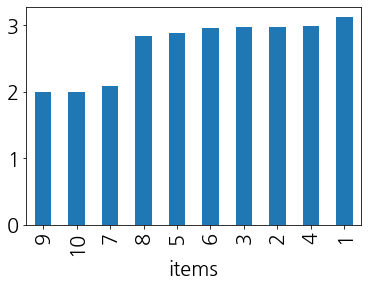

In [4]:
new_data['repeat'].groupby(new_data['items']).mean().sort_values().plot(kind='bar')
# items가 많은데 연속 편성 횟수가 작다 ? => 노출 시간이 클 거같음(60분)

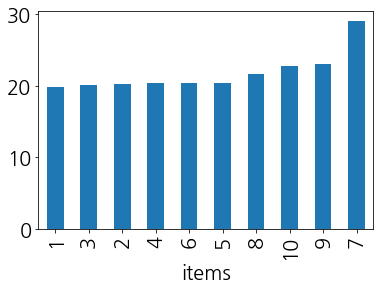

In [5]:
new_data['노출(분)'].groupby(new_data['items']).mean().sort_values().plot(kind='bar')
# 위에서 생각한대로 ! 아이템 수가 많을 수록 평균 노출(분) 시간이 길다

### 한개의 item만 방송한다면 ?!

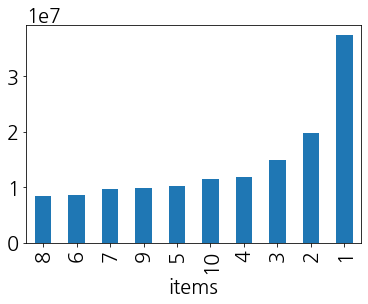

In [6]:
new_data['취급액'].groupby(new_data['items']).mean().sort_values().plot(kind='bar')
# 한번에 방송하는 아이템의 개수가 적을수록 취급액이 높다

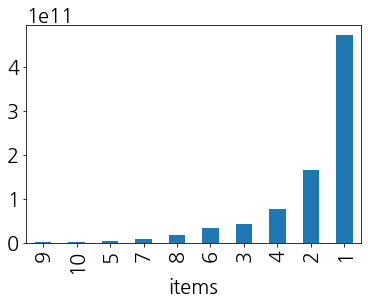

In [16]:
new_data['취급액'].groupby(new_data['items']).sum().sort_values().plot(kind='bar')
# 한개만 방송한게 진짜 월등히 높네 ?......흠

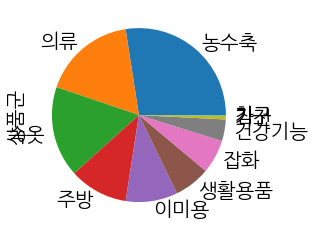

In [8]:
new_data.loc[new_data['items']==1]['상품군'].value_counts().plot(kind='pie') # 12610

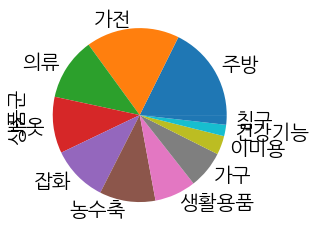

In [9]:
new_data['상품군'].value_counts().plot(kind='pie')
# 전체 중 주방, 가전 상품군이 많은 것에 비해서 농수축이 1개의 item만 방송하는 경우가 많음 !!!

### item 개수가 많은 방송은 ?
=> 가전, 가구가 월등히 높음

* 주의
item 개수가 10 개인 것에 아주 많은 것들이 포함됨
이걸......찍으려다가
10개에 쌀이 한갠데 들어가있는걸 발견했고
코드를 다시짜야하네 ? ....한.ㅇㄹ마ㅡ;ㅣㄴㄷㄹ즈{

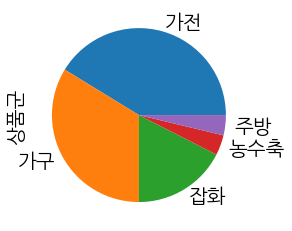

In [10]:
new_data.loc[new_data['items']==10]['상품군'].value_counts().plot(kind='pie')

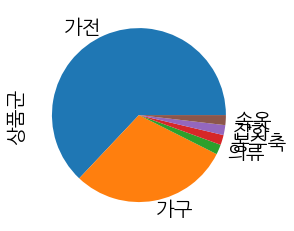

In [12]:
new_data.loc[new_data['items']==9]['상품군'].value_counts().plot(kind='pie')

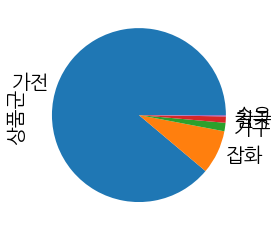

In [13]:
new_data.loc[new_data['items']==8]['상품군'].value_counts().plot(kind='pie')

# 마더코드 활용

In [ ]:
1 ) 마더코드 먼저 찾아서 상품명에서 제거

2 ) 중분류, 소분류 키워드 리스트를 만들어서 => 중_상품코드, 소_상품코드 생성 @ col

3 ) 1+1, 세트, 파격가, 일시불 무이자 이런거 column에서 제거, ~차 이런거는 잘 팔려서 계속 진행하는건뎁
# 근데 어차피 상품코드가 이런거 다 내포하고 있는데 할 이유가 있을까 ?

4 ) 봄, 가을 / 겨울 / 여름을 진짜 나타내는 키워드를 내포하고 있으면 col 세개 만들어서 가중치 주는거 ? (없으면 0, 1, 2, 3) @ col

5 )

## 상품명에서 브랜드 이름 추출

In [ ]:
def replace_word(x) :
    x = x.replace('무)', '무이자 ')
    x = x.replace('(무', '무')
    x = x.replace('일)', '일시불 ')
    x = x.replace('(일', '일')
    x = x.replace('"', '')
    x = x.replace('[',' ')
    x = x.replace(']', ' ')
    x = x.replace('(', ' ')
    x = x.replace(')', ' ')
    return x

df['상품명'] = list(map(replace_word, df['상품명'])) 

In [205]:
# pname 만들기 ( copy용 )
df['pname'] = df['상품명']

# 일시불 이런거 지워야함
for idx in range(len(df['pname'])) :
    x = df['pname'][idx].split(' ')
    if x[0] == '일시불'  or x[0] == '무이자':
        x = x[1:]
        df['pname'][idx] = ' '.join(x)
    else :
        pass
    
    # 첫 단어가 ''인 것 제거
    x = df['pname'][idx].split(' ')
    if x[0] == '' :
        x = x[1:]
        df['pname'][idx] = ' '.join(x)
    else :
        pass
    

In [206]:
Mcode_list, Pcode_list = [], []

for i in range(len(df)) :
    if df['마더코드'][i] not in Mcode_list : 
        Pcode_list.append(df['pname'][i])
        Mcode_list.append(df['마더코드'][i])
    else :
        pass

### 브랜드명 추출 _ 1 
* word2vec
* 사람들이 잘 사용하지 않는 단어임('브랜드 이름')

=> 수기로 브랜드명 ......... 작성해야할 것 같다.. ^^

In [130]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110323 sha256=a333dc692dceeb257af2733ba0d3c4d7e85b8a63f39a1892683ad1c6da504a38
  Stored in directory: c:\users\박소희\appdata\local\pip\cache\wheels\a4\9b\d5\85705a7ab783cd6f7bd718f01d3b1396272f30044e3c36401a
Successfully built smart-open


You should consider upgrading via the 'c:\python\envs\cpu_env\python.exe -m pip install --upgrade pip' command.


In [131]:
import os
import pickle
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Twitter
from gensim.models import Word2Vec, FastText
twitter = Twitter()
def twitter_tokenizer(x):
    return twitter.morphs(x) # noun, pos

In [120]:
# vectorizer
vect = CountVectorizer(tokenizer=twitter_tokenizer, min_df=20, binary=False)
vect.fit(Pcode_list)

TDM = vect.transform(Pcode_list).toarray()
print('TDM Shape : ', TDM.shape)


# tf-idf
tfidf = TfidfVectorizer(tokenizer=twitter_tokenizer).fit(Pcode_list)
tfidf_matrix = tfidf.transform(Pcode_list).toarray()
print('TFIDF Shape : ', tfidf_matrix.shape)

TDM Shape :  (687, 33)
TFIDF Shape :  (687, 1909)


In [128]:
# Word2Vec
NLPdata = pd.DataFrame(Pcode_list, columns=['Pcode_list'])
NLPdata['token'] = NLPdata['Pcode_list'].apply(twitter_tokenizer)
sentences = NLPdata['token'].tolist()

In [136]:
sentences

[['테이', '트', '남성', '셀린', '니트', '3', '종'],
 ['오', '모', '떼', '레이스', '파운데이션', '브라'],
 ['CERINI', 'by', 'PAT', '남성', '소프트', '기모', '릴', '렉스', '팬츠'],
 ['보코', '리버시', '블', '무스', '탕'],
 ['CERINI', 'by', 'PAT', '남성', '풀', '패키지', '기', '모', '니트', '3', '종'],
 ['크로커다일', 'The', '편안한', '코튼', '브라', '팬티', '4', '세트'],
 ['에코', '라', '믹', '통', '주물', '스톤', '냄비', '세트'],
 ['그렉', '노먼', '남성', '구', '스', '다운', '롱', '벤치', '코트'],
 ['뽕', '셰프', '이봉원', '특', '갈비탕', '12', '팩'],
 ['국내', '산', '손질', '갑오징어', '8', '팩'],
 ['멋진', '밥상', '흥양', '농협', '햅쌀', '20', 'kg'],
 ['비버리힐스', '폴로', '클럽', '남성', '기초', '세트', '(', '2018', 'FW', '골드', ')'],
 ['우리', '바다', '손질', '왕', '꼬막', '24', '팩'],
 ['푸마', '에어', '핏', '서', '포트', '브라', '세트', '15', '종', '+', '4', '종'],
 ['일', '시불', 'LG', '통', '돌이', '세탁기'],
 ['마리', '노블', '밍크', '롱', '코트'],
 ['헤스', '티', '지', '엘레나', '라쿤', '양', '가죽', '콤비', '롱', '코트'],
 ['로베르', '타', '디', '까', '메리노', '올', '레이스', '지퍼', '브라', '팬티'],
 ['레이', '프릴', '무빙', '맥시', '풀', '커버', '브라', '팬티'],
 ['벨라', '홈', '논', '슬립', '옷', '걸이', '세트'],
 [

In [134]:
Skip_Gram_model = Word2Vec(sentences, size=100, window=2, min_count=10, workers=8, iter=1000, sg=1)
words = Skip_Gram_model.wv.index2word
vectors = Skip_Gram_model.wv.vectors
Skip_Gram_model.most_similar("LG")

[('S', 0.6129543781280518),
 ('시불', 0.5770043730735779),
 ('kg', 0.5266053676605225),
 ('홈', 0.49262404441833496),
 ('일', 0.4811757802963257),
 ('K', 0.47778698801994324),
 ('슈퍼', 0.4639343023300171),
 ('뉴', 0.4296499490737915),
 ('+', 0.3932446241378784),
 ('형', 0.38606196641921997)]

In [135]:
fasttext_mdoel = FastText(sentences, size=100, window=2, min_count=10, workers=8, iter=1000, sg=1)
words = fasttext_mdoel.wv.index2word

vectors = fasttext_mdoel.wv.vectors

fasttext_mdoel.most_similar("LG")

MemoryError: Unable to allocate 1.49 GiB for an array with shape (2000000, 100) and data type float64

### 브랜드명 추출_2

In [207]:
brand = []
for one_brand in Pcode_list : 
    x = one_brand.split(' ')
    print('index_num : ', Pcode_list.index(one_brand), 'brand_name : ' ,x[0], 'severals : ', x)
    brand.append(x[0])

index_num :  0 brand_name :  테이트 severals :  ['테이트', '남성', '셀린니트3종']
index_num :  1 brand_name :  오모떼 severals :  ['오모떼', '레이스', '파운데이션', '브라']
index_num :  2 brand_name :  CERINI severals :  ['CERINI', 'by', 'PAT', '남성', '소프트', '기모', '릴렉스팬츠']
index_num :  3 brand_name :  보코 severals :  ['보코', '리버시블', '무스탕']
index_num :  4 brand_name :  CERINI severals :  ['CERINI', 'by', 'PAT', '남성', '풀패키지', '기모니트', '3종']
index_num :  5 brand_name :  크로커다일 severals :  ['크로커다일', 'The', '편안한', '코튼', '브라팬티', '4세트']
index_num :  6 brand_name :  에코라믹 severals :  ['에코라믹', '통주물', '스톤', '냄비세트']
index_num :  7 brand_name :  그렉노먼 severals :  ['그렉노먼', '남성', '구스다운', '롱', '벤치코트']
index_num :  8 brand_name :  뽕셰프 severals :  ['뽕셰프', '이봉원', '특갈비탕', '12팩']
index_num :  9 brand_name :  국내산 severals :  ['국내산', '손질갑오징어', '8팩']
index_num :  10 brand_name :  멋진밥상 severals :  ['멋진밥상', '흥양농협', '햅쌀', '20kg']
index_num :  11 brand_name :  비버리힐스폴로클럽 severals :  ['비버리힐스폴로클럽', '남성기초세트', '2018FW골드', '']
index_num :  12 brand_name

index_num :  263 brand_name :  2019년형 severals :  ['2019년형', '글라스락', '퍼플클래식', '유리밀폐용기', '1+1세트', '16조+4조', '']
index_num :  264 brand_name :  뉴질랜드 severals :  ['뉴질랜드', '초록입홍합', '환', '100%']
index_num :  265 brand_name :  크리스티나앤코 severals :  ['크리스티나앤코', '로브앙상블세트']
index_num :  266 brand_name :  리큅 severals :  ['리큅', '블렌더', 'RPM', 'CUBE']
index_num :  267 brand_name :  마르엘라로사티 severals :  ['마르엘라로사티', '휘메일', '풀스킨', '밍크', '후드코트']
index_num :  268 brand_name :  실크트리 severals :  ['실크트리', '풍기인견', '쿨란쥬', '패키지', '19SS', '']
index_num :  269 brand_name :  뱅뱅 severals :  ['뱅뱅', '남성', '썸머', '데님팬츠', '3종', '2019', 'S/S', '']
index_num :  270 brand_name :  마르엘라로사티 severals :  ['마르엘라로사티', '썸머', '레이스', '블라우스', '3종']
index_num :  271 brand_name :  모리츠 severals :  ['모리츠', '에어', '서큘레이터', '1종']
index_num :  272 brand_name :  오렐리안 severals :  ['오렐리안', '풍기인견', '원피스', '2종세트']
index_num :  273 brand_name :  거미손 severals :  ['거미손', '차량용', '공기청정기']
index_num :  274 brand_name :  보몽드 severals :  ['보몽드', '샐비어', '시

index_num :  513 brand_name :  갈란테 severals :  ['갈란테', '프리미엄', '에디션', '남성화', '3종', '+', '면도기', '1종', '']
index_num :  514 brand_name :  EXR severals :  ['EXR', '', '19', 'F/W', '여성', '멀티패키지', '3종', '세트']
index_num :  515 brand_name :  완도꼬마활전복 severals :  ['완도꼬마활전복', '1.3kg']
index_num :  516 brand_name :  EXR severals :  ['EXR', '', '19', 'F/W', '여성', '리버시블', '자켓']
index_num :  517 brand_name :  라니 severals :  ['라니', '퍼니쿡', '그릴', '기본세트']
index_num :  518 brand_name :  트라이 severals :  ['트라이', '브라이트', 'LED', '전등', '', '3세트']
index_num :  519 brand_name :  PN풍년꾸노죽제조기 severals :  ['PN풍년꾸노죽제조기']
index_num :  520 brand_name :  삭루츠 severals :  ['삭루츠', 'F/W', '크로스바디', '백', 'TQ12', '']
index_num :  521 brand_name :  월드컵 severals :  ['월드컵', '19', 'F/W', '남성', '에어러닝화']
index_num :  522 brand_name :  라라츄 severals :  ['라라츄', '헤어볼륨쿠션']
index_num :  523 brand_name :  푸마 severals :  ['푸마', 'DRY-DELL', '기능성', '티셔츠형', '브라탑', '패키지']
index_num :  524 brand_name :  K-SWISS severals :  ['K-SWISS', '', '19',

In [208]:
print(len(set(brand)))
set(brand)

425


{'',
 '1+1보국미니히터',
 '100%리얼',
 '12.5m',
 '19',
 '1세트',
 '2019',
 '2019년',
 '2019년형',
 '2세트',
 '3D매쉬',
 '3인용',
 '467L_딤채김치냉장고',
 '5세트',
 'AAA',
 'AAB의',
 'AAC한우소머리곰탕양곰탕세트',
 'AAD',
 'AAE',
 'AHC',
 'ALL',
 'BBC&IZUMI',
 'CERINI',
 'D',
 'DIOR',
 'EXR',
 'IH',
 'K-SWISS',
 'KF94',
 'LG',
 'LG생활건강',
 'LG스타일러',
 'LG전자',
 'LG트롬',
 'LSX라이크라',
 'NEW프리미엄',
 'NNF',
 'OK',
 'PN풍년꾸노죽제조기',
 'RYN',
 'SK매직',
 'SPC삼립',
 'USPA',
 'VONIN',
 'a4',
 'am마카롱',
 '가이거',
 '갈란테',
 '강레오의',
 '강원도양구',
 '거미손',
 '거창특등급사과',
 '경남제약',
 '고데롤',
 '고창',
 '고칼슘검은콩두유48팩+호두아몬드',
 '골드파일',
 '광동',
 '광동제약',
 '구스터',
 '구워만든',
 '구찌',
 '국내산',
 '국내산참조기12팩',
 '국내생산',
 '국내제조',
 '굿프렌드',
 '궁중',
 '그렉노먼',
 '김병만의',
 '김병지',
 '김선영',
 '김정문의',
 '김정배',
 '까사마루',
 '까사마루행거',
 '깐깐송도순',
 '남영비비안',
 '남해바다',
 '네오젠',
 '네페르티티',
 '노비타',
 '노송가구',
 '노와',
 '농협',
 '농협안심벌꿀',
 '뉴',
 '뉴욕맘',
 '뉴웨이',
 '뉴질랜드',
 '뉴트리원',
 '니봇',
 '닥터',
 '달바',
 '대동모피',
 '대우전자',
 '대웅모닝컴',
 '댄스킨',
 '더블모',
 '더블유베일',
 '델첸',
 '도깨비그릴',
 '도냄',
 '도네이',
 '도루코',
 '도스문도스',
 '두꺼비',
 '디베이지',
 '디비노',


## 마더코드 취급액 평균에 따라 범주화

In [75]:
MD = df['취급액'].groupby(df['마더코드']).describe()
MD3 = pd.DataFrame()
MD3['sum'] = list(df['취급액'].groupby(df['마더코드']).sum())
MD3['count'] = list(MD['count'])
MD3['mean'] = list(MD['mean'])
MD3.head(20)
MD3.corr()

,sum,count,mean
sum,1.000000,0.812212,0.260278
count,0.812212,1.000000,-0.020222
mean,0.260278,-0.020222,1.000000


In [76]:
MD = df['취급액'].groupby(df['마더코드']).describe()
MD2 = pd.DataFrame()
MD2['sum'] = list(df['취급액'].groupby(df['마더코드']).sum().sort_values(ascending=False).index)
MD2['count'] = list(MD['count'].sort_values(ascending=False).index)
MD2['mean'] = list(MD['mean'].sort_values(ascending=False).index)
MD2.head(20)

,sum,count,mean
0,100148,100148,100699
1,100074,100837,100079
2,100155,100448,100548
3,100837,100205,100264
4,100150,100500,100638
5,100255,100203,100317
6,100448,100372,100327
7,100205,100575,100418
8,100253,100155,100435
9,100849,100150,100492


### MD.mean

In [77]:
def make_MD(x) :
    if x > 35000000 :
        return 5
    elif x > 25000000 :
        return 4
    elif x > 15000000 :
        return 3    
    elif x > 10000000 :
        return 2
    else :
        return 1
    
MD['Mcode2'] = list(map(make_MD, MD['mean']))

In [78]:
MD['Mcode2'].value_counts()

3    164
1    133
5    132
4    131
2    127
Name: Mcode2, dtype: int64

In [79]:
def make_MD_col(x) :
    return MD['Mcode2'][x]

df['Mcode'] = list(map(make_MD_col, df['마더코드']))

### 그리기

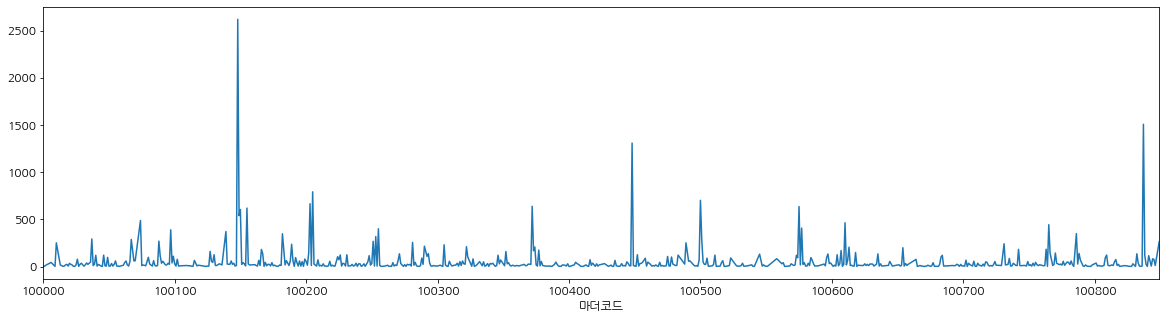

In [228]:
plt.figure(figsize=(20,5))
MD['count'].plot()

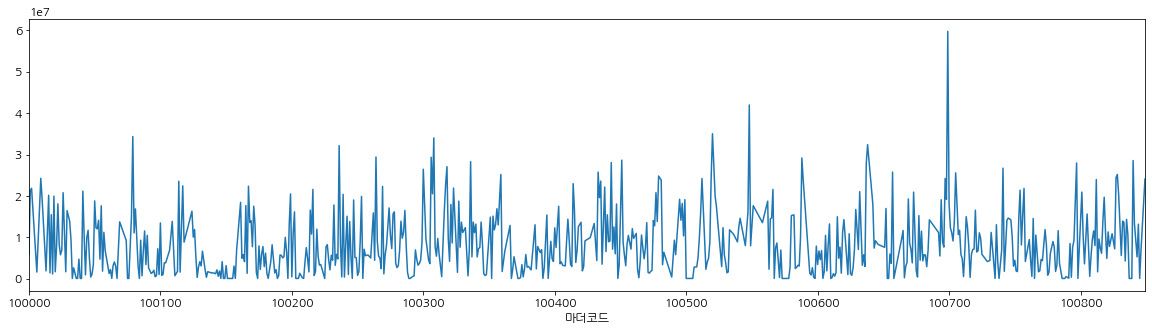

In [230]:
plt.figure(figsize=(20,5))
MD['min'].plot()

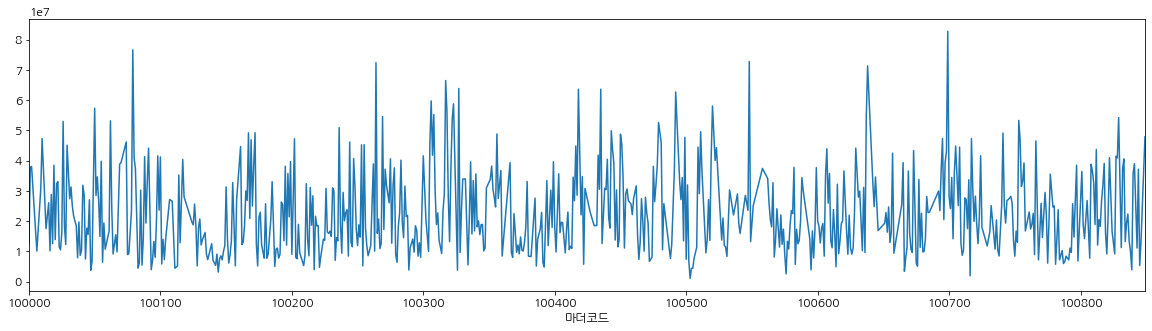

In [231]:
plt.figure(figsize=(20,5))
MD['mean'].plot()

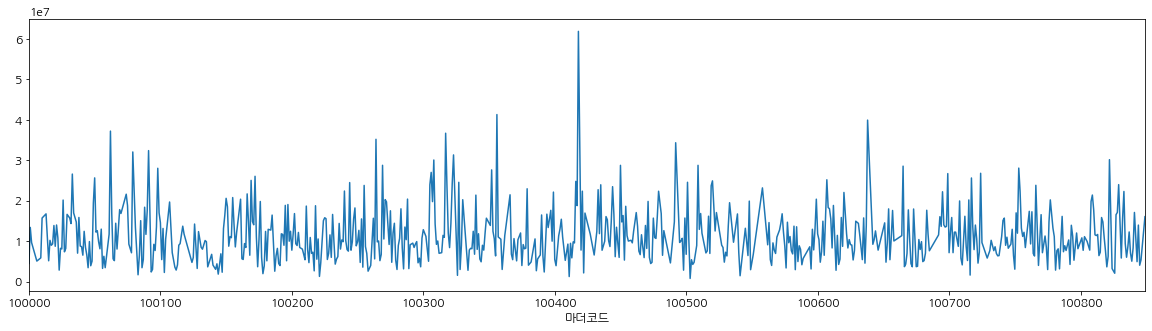

In [232]:
plt.figure(figsize=(20,5))
MD['std'].plot()

# 공휴일 column

## holiday 처음 생성

In [71]:
from datetime import datetime, timedelta

def days_back(x) :
    return x + timedelta(days=-9) ###### q변경

H2 = pd.read_csv('./data/holiday2.csv', encoding='cp949')
H2['holiday'] = pd.to_datetime(H2['holiday'], format='%Y%m%d', errors='raise')
H2['holiday'] = list(map(days_back, H2['holiday']))

H2['holiday_M'] = H2['holiday'].dt.month
H2['holiday_D'] = H2['holiday'].dt.day

# DAYS BACK하면서 2018년으로 넘어간 것들은 제거
H2 = H2[1::].reset_index(drop=True)

# 새로운 col 생성
H2['holiday_idx'] = H2['holiday_M'].astype(str)+H2['holiday_D'].astype(str)
df['new_idx'] = df['month'].astype(str)+df['day'].astype(str)

holiday_ = []
for idx in range(len(df)) :
    for hol_idx in range(len(H2)) : 
        if df['new_idx'][idx] == H2['holiday_idx'][hol_idx] :
            holiday_.append(1)
            break
    if len(holiday_) != idx + 1 :
        holiday_.append(0)


df['holiday'] = holiday_

In [73]:
# df.drop(['new_idx'], axis=1, inplace=True)
# df.to_csv('./data/train_ongoing.csv', encoding='cp949', index=False)
# df.to_excel('./analysis/분석용_ongoing.xlsx', encoding='cp949', index=False)

## 한바퀴 돌았을 때

In [14]:
from datetime import datetime, timedelta

def days_back(x, daynum) :
    return x + timedelta(days=-daynum) ###### q변경


for day_num in range(1, 15) :
    H2 = pd.read_csv('./data/holiday2.csv', encoding='cp949')
    H2['holiday'] = pd.to_datetime(H2['holiday'], format='%Y%m%d', errors='raise')
    for i in range(len(H2)) : 
        H2['holiday'][i] = days_back(H2.iloc[i]["holiday"], day_num)
       # lambda x : x, range(len(H2))

    H2['holiday_M'] = H2['holiday'].dt.month
    H2['holiday_D'] = H2['holiday'].dt.day

    # DAYS BACK하면서 2018년으로 넘어간 것들은 제거
    H2 = H2[1::].reset_index(drop=True)

    # 새로운 col 생성
    H2['holiday_idx'] = H2['holiday_M'].astype(str)+H2['holiday_D'].astype(str)
    df['new_idx'] = df['M'].astype(str)+df['D'].astype(str)

    holiday_ = []
    for idx in range(len(df)) :
        for hol_idx in range(len(H2)) : 
            if df['new_idx'][idx] == H2['holiday_idx'][hol_idx] :
                holiday_.append(1)
                break
        if len(holiday_) != idx + 1 :
            holiday_.append(0)


    df['holiday'+str(day_num)] = holiday_

In [15]:
df.columns

Index(['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'category',
       'brandcode', 'productcode', 'items', 'name', 'pay_type', 'price',
       'salesAMT/total', 'salesAMT', 'holiday', 'new_idx', 'holiday1',
       'holiday2', 'holiday3', 'holiday4', 'holiday5', 'holiday6', 'holiday7',
       'holiday8', 'holiday9', 'holiday10', 'holiday11', 'holiday12',
       'holiday13', 'holiday14'],
      dtype='object')

# 모델링으로 가는중

과적합을 의심하고 또 의심해 ! 

## feature 정리

In [80]:
# mape 함수 사용
# mean_absolute_percentage_error (MAPE)
# def mape(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape(A, F): 
    return np.mean(np.abs((A - F) / A)) * 100

In [83]:
new_data = df
print(new_data.columns)

# column명 영어로 변경
# ver1
# new_data.columns = ['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'category',
#        'brandcode', 'productcode', 'items', 'name', 'pay_type', 'price', 'salesAMT/total', 'salesAMT']

# ver3 ( holiday 추가 )
# new_data.columns = ['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'category',
#                     'Mothercode', 'productcode', 'items', 'name',  'price', 
#                     'salesAMT/total', 'salesAMT', 'new_idx' ,'holiday' ]

# ver 4
new_data.columns = ['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'category',
                    'Mothercode', 'productcode', 'items', 'name',  'price', 
                    'salesAMT/total', 'salesAMT','holiday' ,'Mcode']

print(new_data.columns)

##########################################################################
# 참고
# 'newseasonal','supersale','domestic','free','bombsale','100%','natural','trim', 'female', 'male'
# '햇', '초특가', '국내산', '무료', '파격가', '100%', '자연산', '손질', '여성', '남성'

Index(['month', 'day', '요일', 'hour', 'minute', '노출(분)', 'repeat', '상품군',
       '마더코드', '상품코드', 'items', '상품명', '판매단가', '취급액/total', '취급액', 'holiday',
       'Mcode'],
      dtype='object')
Index(['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'category',
       'Mothercode', 'productcode', 'items', 'name', 'price', 'salesAMT/total',
       'salesAMT', 'holiday', 'Mcode'],
      dtype='object')


In [84]:
# 상품군 get_dummies를 위한 category 내용 영어로 변경
def change_category_name(x) :
    if x == '의류' :
        return 'clothes'
    elif x == '속옷' :
        return 'underware'
    elif x == '주방' :
        return "kitchen"
    elif x == "농수축" :
        return "food"
    elif x == "이미용" :
        return "beauty"
    elif x == "가전" :
        return "electronics"
    elif x == "생활용품" :
        return "necessaries"
    elif x == "건강기능" :
        return "health"
    elif x == "잡화" : 
        return "goods"
    elif x == "가구":
        return "furniture"
    elif x == "침구":
        return "bedding"

new_data['category'] = list(map(change_category_name, new_data['category'])) #################

# 상품군 get_dummies
new_data = pd.get_dummies(new_data,
                          columns=['category'],# category
                          prefix='category', drop_first=True)



In [85]:
new_data.columns

Index(['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'Mothercode',
       'productcode', 'items', 'name', 'price', 'salesAMT/total', 'salesAMT',
       'holiday', 'Mcode', 'category_bedding', 'category_clothes',
       'category_electronics', 'category_food', 'category_furniture',
       'category_goods', 'category_health', 'category_kitchen',
       'category_necessaries', 'category_underware'],
      dtype='object')

In [86]:
# train data
X = new_data.drop(["salesAMT", 'name'], axis=1) # 'new_idx', "salesAMT",'name', 'new_idx'
y = new_data["salesAMT"] #salesAMT

## 랜덤포레스트

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### 일단해보아_재호님 모델 참고

점수 :  60.43799355512638


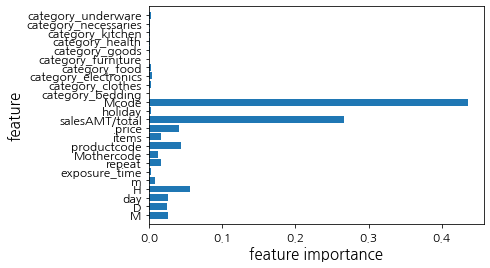

In [88]:
# train data 내에서 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=147, shuffle=True)

# model 설정
rf_model = RandomForestRegressor(n_estimators=300, n_jobs=-1,)

# 학습
rf_model.fit(X_train, y_train)

# 예측
pred = rf_model.predict(X_test)

# 점수 확인
print('점수 : ',mape(y_test, pred))

# feature 중요도 확인을 위해서 !
n_feature = X.shape[1]
index = np.arange(n_feature)

plt.barh(index, rf_model.feature_importances_, align='center')
plt.yticks(index, X.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()
# 9일 26.04317289925211
# 50000 변경 26.027813153493405
### saleAMT/total 제외 :  42.02507430901878
### saleAMT/total, holiday 제외 : 41.78108235239005
# 1 변경
### saleAMT/total, holiday 제외 40.56



#--------------------------------------
# 아무것도 안했을 때 : 573.0829524307844
# items, salesAMT/total, holiday 추가 : 68
#--------------------------------------------
# items feature 중요도가 낮게 나타남
# Mcode 범주화 추가 : 62.96 
# Mcode 범주화 변경 : 60.87267131334815

##### holiday 만 보기

TypeError: 'int' object is not subscriptable

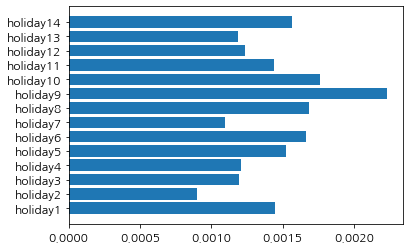

In [35]:
plt.barh(index[13:27], rf_model.feature_importances_[13:27], align='center')
plt.yticks(index[13:27], X.columns[13:27])
plt.ylim(-1, n_feature[13:27])
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

### GridSearchCV _ 준영님 모델 참고

In [154]:
# train,test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=147, shuffle=True)

# 모델 설정
rf_model = RandomForestRegressor(random_state = 147, n_estimators=300)

# GridSearchCV에 사용할 parameter 설정
# 어떤 기준으로 선택한건지 ? 
param ={
    'n_estimators'      : [20],
    'max_depth'         : [20,40],
    'min_samples_leaf'  : [4,10,15],
    'min_samples_split' : [10,100,1000],
    'bootstrap' : [True]
}

rf_model = GridSearchCV(rf_model, param_grid = param)

rf_model.fit(X_train, y_train)

print('최적 파라미터      : ', rf_model.best_params_)
print('최고 예측 정확도   : {0:.4f}'.format(rf_model.best_score_))

rf_model_best = rf_model.best_estimator_

pred = rf_model_best.predict(X_test)
print('검증 데이터 정확도 : {0:.4f}'.format(r2_score(pred, y_test)))

# 점수 계산
print('점수 : ',mape(pred,y_test))
# 7일전 28.428450042723792
# 14일전 28.37060225738518
# 7 + 14 28.382509327836786

최적 파라미터      :  {'bootstrap': True, 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
최고 예측 정확도   : 0.7793
검증 데이터 정확도 : 0.7239
점수 :  28.382509327836786


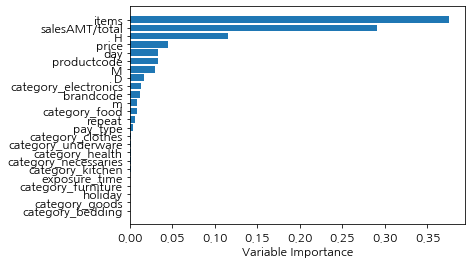

In [146]:
featureImportance = rf_model_best.feature_importances_

# featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, X_train.keys()[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

### RandomSearchCV _ 다른 Search 방법으로 시도해보자 !

### BayesSearchCV

## LGBM_민재님 모델 참고

In [47]:
import lightgbm as lgb

점수 :  139.0231579209107


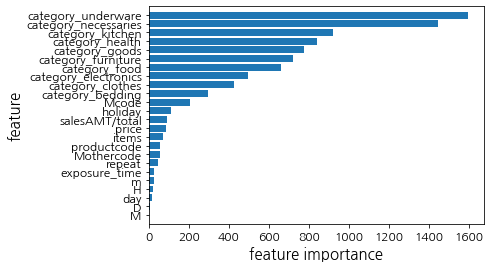

In [89]:
# train data 내에서 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=147, shuffle=True)

# model 설정
model = lgb.LGBMRegressor(random_state=147, n_estimators=300)

# 학습
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 점수 확인
print('점수 : ', mape(y_test,pred))

# feature 중요도 확인을 위해서 !
n_feature = X.shape[1]
index = np.arange(n_feature)

featureImportance = model.feature_importances_
#featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])

plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, X_train.keys()[sorted_idx])
plt.yticks(index, X.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)



plt.show()

# holiday, items 등등  : 161.01